# 프로젝트: KoChatGPT 업그레이드

## 서론
이 프로젝트의 목표는 기존 KoChatGPT 모델을 기반으로 다양한 개선 전략을 적용하여 자신만의 Custom ChatGPT를 개발하는 것입니다.
제시된 전략(데이터셋 정제, 신규 데이터셋 추가, 파운데이션 모델 교체 등) 중 하나 이상을 선택하여 모델을 업그레이드하고 성능을 평가합니다.

## 학습 목표 및 평가 기준 (Rubric)
- **최종 목표:** 아래 전략 중 하나 이상을 사용하여 모델의 정량적/정성적 성능 향상을 달성합니다.

- **평가 기준 1**: 모델 성능 향상
  1. **기존 데이터셋 정제:** 데이터셋을 추가 정제하고, Beam search, Top-k sampling 등 Generation 기법 실험을 통해 모델 성능을 향상시킨다.
  2. **새로운 데이터셋 추가:** 새로운 데이터를 직접 수집/전처리하여 모델 성능을 향상시킨다.
  3. **학습 전략/모델 변경:** 더 적절한 학습 전략(SFT, RM, PPO)을 적용하거나 Initial model을 변경하여 모델 성능을 향상시킨다.

- **평가 기준 2: 결과 분석**
  1. **KoGPT2 vs SFT:** 기존 KoGPT2 모델과 SFT 적용 모델의 결과물을 정량/정성적으로 비교 분석한다.
  2. **SFT vs RM:** SFT 모델과 RM(Reward Model)을 적용한 모델의 결과물을 정량/정성적으로 비교 분석한다.

## 1. 라이브러리 설치 및 환경 설정

In [51]:
# 필요한 라이브러리 설치 (최초 1회만 실행)
!pip install torch
!pip install transformers
!pip install sentencepiece
!pip install pandas
!pip install dataclasses
!pip install accelerate
!pip install loralib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.4 MB/s eta 0:00:00


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


##### 한글 폰트 설정

In [52]:
!sudo apt update
!sudo apt install fonts-nanum -y

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import logging

logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

fontpath = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
fontprop = fm.FontProperties(fname=fontpath, size=12)
plt.rcParams["font.family"] = fontprop.get_name()

print(f"설정된 폰트: {fontprop.get_name()}")

0% [Working]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Get:1 http://security.ubuntu.com/ubuntu noble-security InRelease [126 kB]
Get:2 http://archive.ubuntu.com/ubuntu noble InRelease [256 kB]
Get:3 http://security.ubuntu.com/ubuntu noble-security/restricted amd64 Packages [2306 kB]
Get:4 http://archive.ubuntu.com/ubuntu noble-updates InRelease [126 kB]
Get:5 http://archive.ubuntu.com/ubuntu noble-backports InRelease [126 kB]m
Get:6 http://archive.ubuntu.com/ubuntu noble/multiverse amd64 Packages [331 kB]
Get:7 http://archive.ubuntu.com/ubuntu noble/restricted amd64 Packages [117 kB]
Get:8 http://archive.ubuntu.com/ubuntu noble/universe amd64 Packages [19.3 MB] 
Get:9 http://security.ubuntu.com/ubuntu noble-security/multiverse amd64 Packages [34.6 kB]
Get:10 http://security.ubuntu.com/ubuntu noble-security/universe amd64 Packages [1136 kB]
Get:11 http://security.ubuntu.com/ubuntu noble-security/main amd64 Packages [1439 kB]33m
Get:12 http://archive.ubuntu.com/ubuntu noble/main amd64 Packages [1808 kB]33m 
Get:13 http://archive.ubuntu.com/u

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu noble/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4180 kB/s)      
debconf: delaying package configuration, since apt-utils is not installed

78Selecting previously unselected package fonts-nanum.
(Reading database ... 52749 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 20%] [###########...............................................] 8Unpacking fonts-nanum (20200506-1) ...
7Progress: [ 40%] [#######################...............................

##### 라이브러리 임포트

In [53]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd
import numpy
import json
from typing import Optional, Dict, Sequence
from torch.utils.data import Dataset
from dataclasses import dataclass
import logging
import copy

---

## 2. 모델 성능 비교 분석 (평가 기준 2)

### 2.1. 기존 KoGPT2 vs SFT 적용 모델 결과 분석
> **[평가 기준 2.1]** 기존 모델의 결과물과 SFT를 적용한 모델의 결과물을 정량/정성적으로 비교/분석했는가?

먼저, 튜닝하지 않은 원본 `skt/kogpt2-base-v2` 모델의 답변을 생성하여 베이스라인으로 삼습니다.
이후 SFT(Supervised Fine-Tuning)를 진행하고, 같은 프롬프트에 대해 SFT 모델이 어떻게 답변하는지 비교하여 성능 향상을 확인합니다.

#### **[SFT 이전] 베이스라인 모델 성능 확인**

In [54]:
# --- 1. 기본 설정 ---
device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "skt/kogpt2-base-v2"
print(f"Using device: {device}")
print(f"Loading model: {model_name}")

# --- 2. 베이스라인 모델 및 토크나이저 로드 ---
try:
    base_tokenizer = AutoTokenizer.from_pretrained(model_name)
    if base_tokenizer.pad_token is None:
        base_tokenizer.pad_token = base_tokenizer.eos_token

    base_model = AutoModelForCausalLM.from_pretrained(model_name).to(device)
    base_model.eval()
    print("Baseline Model and Tokenizer loaded successfully.")
except Exception as e:
    print(f"Error loading model or tokenizer: {e}")

# --- 3. 데이터셋에서 프롬프트 로드 ---
prompts = []
try:
    with open('./KoChatGPT/data_kochatgpt/kochatgpt_1_SFT.jsonl', 'r', encoding='utf-8') as f:
        dataset = json.load(f)
        prompts = [item['prompt'] for item in dataset]
    print(f"Successfully loaded {len(prompts)} prompts from dataset.")
except Exception as e:
    print(f"Error loading or parsing 'data/kochatgpt_1_SFT.jsonl': {e}")
    prompts.append("불고기용 고기 한우에요?")

# --- 4. 텍스트 생성 함수 ---
def generate_text(model, tokenizer, prompt_text, generation_params):
    try:
        input_ids = tokenizer.encode(prompt_text, return_tensors='pt').to(device)
        with torch.no_grad():
            output_sequences = model.generate(input_ids=input_ids, **generation_params)
        return tokenizer.decode(output_sequences[0], skip_special_tokens=True)
    except Exception as e:
        return f"An error occurred during text generation: {e}"

# --- 5. 다양한 디코딩 전략으로 베이스라인 성능 테스트 ---
prompt_index = 0
prompt = prompts[prompt_index] if prompts and 0 <= prompt_index < len(prompts) else "불고기용 고기 한우에요?"
print(f"--- Prompt (Index: {prompt_index}) ---")
print(f'"{prompt}"')
print("\n" + "="*50 + "\n")

# --- 추천 베이스라인 1: Beam Search (품질/일관성 측정용) ---
print("### 베이스라인 1: Beam Search (num_beams=5) ###")
params_beam = {"max_length": 128, "num_beams": 5, "no_repeat_ngram_size": 2, "do_sample": False, "early_stopping": True}
output = generate_text(base_model, base_tokenizer, prompt, params_beam)
print(output)
print("\n" + "="*50 + "\n")

# --- 추천 베이스라인 2: Moderated Sampling (자연스러움/창의성 측정용) ---
print("### 베이스라인 2: Moderated Sampling (temperature=0.7, top_k=50) ###")
params_sampling = {"max_length": 128, "do_sample": True, "temperature": 0.7, "top_k": 50, "top_p": 0.95}
output = generate_text(base_model, base_tokenizer, prompt, params_sampling)
print(output)
print("\n" + "="*50 + "\n")

Using device: cuda
Loading model: skt/kogpt2-base-v2
Baseline Model and Tokenizer loaded successfully.
Successfully loaded 12000 prompts from dataset.
--- Prompt (Index: 0) ---
"불고기용 고기 한우에요?"


### 베이스라인 1: Beam Search (num_beams=5) ###
불고기용 고기 한우에요? ᄒᄒ
이거 진짜 맛있더라구요 ᄏᄏ
고기랑 같이 먹으니까 더 맛있어요!!!
이렇게 고기랑 함께 먹을 수 있어서 너무 좋았어요~~
고기가 정말 맛있게 잘 익었습니다!
고기를 구워먹을 수 있는 고기집이라고 하네요!
고기집답게 고기 굽는 과정이 굉장히 간단하답니다  
고기 굽기 전에 고기를 굽고 나서 고기를 구워야하는데
그런데 고기를 구울 때 고기를 다 굽지 않고 그냥 굽기만 하면 되더


### 베이스라인 2: Moderated Sampling (temperature=0.7, top_k=50) ###
불고기용 고기 한우에요?????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????




---

#### **[SFT] Supervised Fine-Tuning 진행**

이제 본격적으로 SFT를 진행합니다. SFT는 미리 준비된 (질문, 답변) 쌍 데이터셋을 이용해 모델을 지도 학습시키는 과정입니다.
이를 통해 모델이 사용자의 질문(Instruction) 의도에 맞는 답변(Response)을 생성하도록 길들일 수 있습니다.

##### **SFT 1단계: 모델 및 토크나이저 재설정**
SFT를 위해 원본 `skt/kogpt2-base-v2` 모델을 다시 로드합니다.
토크나이저에는 문장의 시작(`bos`), 끝(`eos`), 패딩(`pad`) 등을 명확히 알려주기 위해 special token들을 설정합니다. 이는 모델이 문장의 구조를 더 잘 학습하게 도와줍니다.

In [55]:
# SFT를 위한 모델과 토크나이저를 새로 로드합니다.
sft_model = AutoModelForCausalLM.from_pretrained('skt/kogpt2-base-v2')
sft_tokenizer = AutoTokenizer.from_pretrained(
    'skt/kogpt2-base-v2', bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
    padding_side="right",
    model_max_length=512,
)

print(sft_tokenizer)

GPT2TokenizerFast(name_or_path='skt/kogpt2-base-v2', vocab_size=51200, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '</s>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<usr>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("<sys>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	5: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	6: AddedToken("<mask>", rstrip=False, lstrip=False, single_word=

##### **SFT 2단계: 데이터셋 클래스 정의**
`kochatgpt_1_SFT.jsonl` 데이터를 불러와 SFT 학습에 적합한 형태로 가공하는 `Dataset` 클래스를 정의합니다.

- **Instruction 형식 변환**: "질문:{prompt} 답변:{completion}" 과 같은 형태로 데이터를 변환하여 모델이 질문과 답변의 관계를 학습하도록 합니다.
- **Label 마스킹**: 모델이 답변 부분만 학습하도록, 질문(prompt) 부분의 레이블을 `-100`으로 마스킹 처리합니다. 이는 SFT의 핵심적인 부분입니다.


In [56]:
class SFT_dataset(Dataset):
    """SFT 학습을 위한 데이터셋 클래스"""
    def __init__(self, data_path_1_SFT: str, tokenizer: transformers.PreTrainedTokenizer, verbose=False):
        super(SFT_dataset, self).__init__()
        logging.warning("Loading data...")

        # 데이터 파일 로드
        with open(data_path_1_SFT, "r", encoding='utf-8-sig') as json_file:
            list_data_dict = json.load(json_file)

        # 프롬프트 형식 정의
        PROMPT_DICT = {
            "prompt_input": (
                "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
            )
        }
        prompt_input = PROMPT_DICT["prompt_input"]

        # 소스(질문)와 타겟(답변) 분리 및 형식 적용
        sources = [prompt_input.format_map(example) for example in list_data_dict]
        targets = [f"{example['completion']}{tokenizer.eos_token}" for example in list_data_dict]

        # 소스와 타겟을 합쳐 전체 학습 샘플 생성
        examples = [s + t for s, t in zip(sources, targets)]

        # 소스와 전체 샘플 토크나이징
        sources_tokenized = self._tokenize_fn(sources, tokenizer)
        examples_tokenized = self._tokenize_fn(examples, tokenizer)

        # 레이블 생성 및 마스킹
        input_ids = examples_tokenized["input_ids"]
        labels = copy.deepcopy(input_ids)
        for label, source_len in zip(labels, sources_tokenized["input_ids_lens"]):
            label[:source_len] = -100  # 질문 부분은 loss 계산에서 제외

        self.input_ids = input_ids
        self.labels = labels
        logging.warning("Loading data done!!: %d" % (len(self.labels)))

    def _tokenize_fn(self, strings: Sequence[str], tokenizer: transformers.PreTrainedTokenizer) -> Dict:
        """문자열 시퀀스를 토크나이징하는 내부 함수"""
        tokenized_list = [
            tokenizer(text, return_tensors="pt", padding="longest", max_length=tokenizer.model_max_length, truncation=True)
            for text in strings
        ]
        input_ids = [tokenized.input_ids[0] for tokenized in tokenized_list]
        input_ids_lens = [tokenized.input_ids.ne(tokenizer.pad_token_id).sum().item() for tokenized in tokenized_list]
        return dict(input_ids=input_ids, input_ids_lens=input_ids_lens)

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, i) -> Dict[str, torch.Tensor]:
        return dict(input_ids=self.input_ids[i], labels=self.labels[i])

##### **SFT 3단계: 데이터 콜레이터 정의**
`Dataset`에서 가져온 개별 샘플들을 하나의 배치(batch)로 묶는 역할을 하는 `DataCollator` 클래스를 정의합니다. 이 과정에서 배치 내 샘플들의 길이를 맞추기 위해 패딩(padding)을 적용합니다.


In [57]:
@dataclass
class DataCollatorForSupervisedDataset(object):
    """데이터 샘플들을 배치로 만들기 위한 데이터 콜레이터"""
    tokenizer: transformers.PreTrainedTokenizer

    def __call__(self, instances: Sequence[Dict]) -> Dict[str, torch.Tensor]:
        input_ids, labels = tuple([instance[key] for instance in instances] for key in ("input_ids", "labels"))

        # 입력과 레이블을 패딩 토큰으로 패딩
        input_ids = torch.nn.utils.rnn.pad_sequence(
            input_ids, batch_first=True, padding_value=self.tokenizer.pad_token_id
        )
        labels = torch.nn.utils.rnn.pad_sequence(labels, batch_first=True, padding_value=-100)

        return dict(
            input_ids=input_ids,
            labels=labels,
            attention_mask=input_ids.ne(self.tokenizer.pad_token_id),
        )

##### **SFT 4단계: 데이터셋 및 트레이너 준비**
앞서 정의한 클래스들을 이용해 실제 데이터셋과 데이터 콜레이터 객체를 만듭니다. 그리고 `TrainingArguments`로 학습 설정을 정의한 후, `Trainer` 객체를 생성하여 모든 것을 하나로 묶습니다.


In [58]:
# 데이터셋 및 데이터 콜레이터 인스턴스 생성
train_dataset = SFT_dataset(data_path_1_SFT='./KoChatGPT/data_kochatgpt/kochatgpt_1_SFT.jsonl', tokenizer=sft_tokenizer)
data_collator = DataCollatorForSupervisedDataset(tokenizer=sft_tokenizer)

# 데이터셋 샘플 확인 (input_ids와 masking 처리된 labels)
print('input : %s'%train_dataset.input_ids[0])
print('output: %s'%train_dataset.labels[0])

# 트레이닝 파라미터 설정
training_args = transformers.TrainingArguments(
    output_dir="sft_model_test",        # 모델과 체크포인트가 저장될 디렉토리
    overwrite_output_dir=True,
    num_train_epochs=1,                 # 전체 데이터셋에 대한 학습 횟수
    per_device_train_batch_size=8,      # 장치(GPU)당 배치 크기
    warmup_steps=5,                     # 학습률 스케줄러를 위한 웜업 스텝 수
    prediction_loss_only=True,
    fp16=True                           # 혼합 정밀도 학습(Mixed Precision Training) 활성화
)

# 트레이너 객체 생성
trainer = transformers.Trainer(
    model=sft_model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset
)

input : tensor([  739,   378,   378,   378, 14659, 13394, 37091, 10651,   383, 25841,
         8006, 14914,   375,  7673, 20479,  8091, 22311,  9036, 30902, 13675,
          375,   378,   378,   378, 41951,   454,  9549, 20549,   383,  8142,
         7192, 14914,   382, 37767, 13753,  8263,  7166,   739,  8352,  7659,
         9594, 25585, 13600,  8022,  9378, 11532,  9887, 11218,  9111, 16691,
        10351, 10561,  9128, 20479,  8091,  9065,  9446,  9036, 28420, 26521,
        10163, 26367,  6958,  9030,  9882, 12317, 25882,  9209, 37194, 10351,
         9036, 12168, 10529, 15989,  9719, 15434, 10552, 11188, 13362,  9036,
        15805, 11300, 11846,  9146, 16691,  9181,  7397, 15806, 13480, 11342,
        17596,  9161, 19996,  9025, 25006, 18595,  9966, 12592, 10751, 11814,
         8711,  9046, 12450,  9117,  7377, 12521,     1])
output: tensor([ -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -10

##### **SFT 5단계: 모델 학습 및 저장**
`trainer.train()`을 호출하여 SFT를 시작합니다. 학습이 완료되면, `save_pretrained`를 사용해 튜닝된 모델의 가중치를 저장합니다.

In [59]:
# SFT 학습 시작
trainer.train()

# 학습된 모델 저장
sft_model.save_pretrained('./here_models/sft_output_model')

`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
500,2.975400
1000,2.781800
1500,2.685000


##### **SFT 6단계: SFT 모델 성능 평가**
학습이 완료된 SFT 모델을 로드하여 베이스라인과 동일한 프롬프트로 답변을 생성해봅니다. 베이스라인 모델의 결과와 비교하여 모델이 얼마나 개선되었는지 정성적으로 평가합니다.

In [60]:
# 학습된 SFT 모델과 토크나이저로 텍스트 생성 파이프라인 생성
sft_generator = transformers.pipeline('text-generation', model='./here_models/sft_output_model', tokenizer=sft_tokenizer, device=0)

# SFT 모델 테스트를 위한 생성 파라미터
generation_args = dict(
    num_beams=5,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=375, # \n
    max_new_tokens=64,
    do_sample=False,
    early_stopping=True
)

# 베이스라인 테스트와 동일한 프롬프트 리스트
list_prompt = ['불고기용 고기 한우에요?',
            '리처드 닉슨이 43대 부통령직을 수행한 년도는?',
            '시카고 오헤어 국제공항은 어디에 있어?',
            '오늘 미세먼지 어때?']

# SFT 모델에 맞는 프롬프트 형식으로 변환
PROMPT_DICT = {
    "prompt_input": (
        "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
    )
}
list_formatted_prompt = [PROMPT_DICT['prompt_input'].format_map({'prompt' : tmp}) for tmp in list_prompt]

# SFT 모델로 결과 생성 및 출력
print("--- SFT Model Generation Results ---")
list_result = sft_generator(list_formatted_prompt, **generation_args)
for prompt, result in zip(list_prompt, list_result):
    print(f"Prompt: {prompt}")
    print(f"Generated: {result[0]['generated_text']}")
    print("-" * 30)

# GPU 메모리 정리
torch.cuda.empty_cache()

Device set to use cuda:0
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


--- SFT Model Generation Results ---
Prompt: 불고기용 고기 한우에요?
Generated: ### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):'죄송합니다, 저는 인공지능 어시스턴트이기 때문에 고기를 먹을 수 없습니다. 하지만 일반적으로 불고기용 고기는 건강에 좋아서 많은 사람들이 즐겨 먹는 음식 중 하나입니다. 그러나 일부 식당에서는 불고기용 고기를 판매하지 않는 경우도 있으니 해당 식당의 공식 홈페이지나 전화로 문의해보
------------------------------
Prompt: 리처드 닉슨이 43대 부통령직을 수행한 년도는?
Generated: ### Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

### Response(응답):'리처드 닉슨은 47대 부통령직을 수행했습니다.賢子, Johnson, Michaelson 등이 그 주인공입니다.賢子와 Johnson은 리처드 닉슨이 41대 부통령직을 맡은 년도를 알지 못합니다.賢子는 리처드 닉슨이 46대 부통령직을 맡았던 년도를
------------------------------
Prompt: 시카고 오헤어 국제공항은 어디에 있어?
Generated: ### Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어?

### Response(응답):'저는 인공지능 어시스턴트이기 때문에 시카고에 대한 정보를 가지고 있지 않습니다. 하지만 시카고는 미국 캘리포니아주 로스앤젤레스에 위치한 도시입니다. 시카고는 미국에서 가장 유명한 도시 중 하나이며, 많은 사람들이 방문하고 있는 곳 중 하나입니다. 따라서 시카고는 미국의 대표적인 도시 중 하나입니다.ч
------------------------------
Prompt: 오늘 미세먼지 어때?
Generated: ### Instruction(명령어):
오늘 미세먼지 어때?

### Response(응답):'저는 인공지능 어시스턴트이기 

### 2.2. SFT 모델 vs RM 적용 모델 결과 분석
> **[평가 기준 2.2]** SFT를 적용한 모델의 결과물과 RM을 적용한 모델의 결과물을 정량/정성적으로 비교/분석했는가?

여기서는 좋은 답변에 높은 점수(보상, Reward)를, 나쁜 답변에 낮은 점수를 주도록 학습된 보상 모델(Reward Model, RM)을 만듭니다. 이 보상 모델은 이후 3단계 PPO 학습에서 생성 모델(Actor)을 올바른 방향으로 강화하는 "평가자" 역할을 하게 됩니다.

##### **RM 1단계: 필요 라이브러리 임포트 및 모델/토크나이저 준비**
RM 학습을 위해 필요한 클래스들을 `chatgpt` 폴더에서 임포트합니다.
SFT 단계와 마찬가지로, `skt/kogpt2-base-v2`를 기반으로 보상 모델을 만들고, special token이 추가된 토크나이저를 준비합니다.

In [61]:
# RM 학습에 필요한 클래스 임포트
from chatgpt.dataset import RewardDataset
from chatgpt.models.base import RewardModel
from chatgpt.trainer.strategies import NaiveStrategy
from chatgpt.trainer.rm import RewardModelTrainer

from transformers.models.gpt2.configuration_gpt2 import GPT2Config
from transformers.models.gpt2.modeling_gpt2 import GPT2Model

import torch.nn as nn
import random

# SFT와 동일한 토크나이저 설정 사용
rm_tokenizer = AutoTokenizer.from_pretrained(
    'skt/kogpt2-base-v2', bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
    padding_side="right",
    model_max_length=512,
)

##### **RM 2단계: Custom Reward Model 클래스 정의**
Hugging Face의 `GPT2Model`을 기반으로, 문장의 좋고 나쁨을 판단하여 점수(reward)를 출력하는 Custom Reward Model 클래스(`GPTRM_custom`)를 정의합니다.

- `GPT2Model` 위에 `value_head`라는 이름의 Linear 레이어를 추가하여, 모델의 최종 출력이 단일 값(점수)이 되도록 설계합니다.
- SFT에서 확장된 토크나이저의 어휘 크기에 맞게 모델의 임베딩 크기를 조정(`resize_token_embeddings`)합니다.

In [62]:
class GPTRM_custom(RewardModel):
    """
    GPT-2를 기반으로 하는 Custom Reward Model.
    입력된 텍스트의 좋고 나쁨을 판단하여 단일 점수(reward)를 출력합니다.
    """
    def __init__(self,
                 pretrained: Optional[str] = None,
                 config: Optional[GPT2Config] = None,
                 checkpoint: bool = False,
                 lora_rank: int = 0,
                 lora_train_bias: str = 'none',
                 tokenizer=None) -> None:

        if pretrained is not None:
            # 사전 학습된 GPT2 모델을 불러옵니다.
            model = GPT2Model.from_pretrained(pretrained)
            # Special token이 추가된 토크나이저에 맞게 임베딩 크기를 조정합니다.
            model.resize_token_embeddings(len(tokenizer))
        elif config is not None:
            model = GPT2Model(config)
        else:
            model = GPT2Model(GPT2Config())

        if checkpoint:
            model.gradient_checkpointing_enable()

        # 모델의 마지막 hidden state를 입력으로 받아 단일 점수를 출력하는 value_head를 정의합니다.
        value_head = nn.Linear(model.config.n_embd, 1)

        # 부모 클래스인 RewardModel을 초기화합니다.
        super().__init__(model, value_head, lora_rank, lora_train_bias)

        if pretrained is not None:
            self.model = model
            self.pretrained = pretrained

    def save_pretrained(self, dir):
        if self.pretrained is not None:
            self.model.save_pretrained(dir)

# NaiveStrategy 컨텍스트 내에서 RM 모델을 초기화합니다.
with NaiveStrategy().model_init_context():
    rm_model = GPTRM_custom(pretrained='skt/kogpt2-base-v2', lora_rank=0, tokenizer=rm_tokenizer).cuda()

##### **RM 3단계: 데이터 전처리 (Pairwise)**
RM 학습을 위해서는 "더 좋은 답변(chosen)"과 "더 나쁜 답변(rejected)"을 한 쌍으로 묶은 데이터가 필요합니다. `kochatgpt_2_RM.jsonl` 파일에는 1개의 프롬프트와 3개의 순위가 매겨진 답변이 들어있습니다.

이것을 `(prompt, chosen, rejected)` 형태의 여러 쌍으로 분해하여 데이터셋을 재구성합니다. 예를 들어, (답변0, 답변1, 답변2)가 있고 순위가 (1, 2, 0)이라면, (답변2 > 답변1), (답변2 > 답변0), (답변1 > 답변0) 이므로 3개의 쌍을 만들 수 있습니다.

In [63]:
# RM 데이터셋 로드
with open('./KoChatGPT/data_kochatgpt/kochatgpt_2_RM.jsonl', "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)

# 랭킹 정보를 바탕으로 (chosen, rejected) 쌍 만들기
total_data_ranking2chosen = []
for tmp in list_data_dict:
    one_data_ranking2chosen = []

    # 3개의 답변 중 2개를 뽑는 모든 조합(3가지)에 대해 쌍을 생성
    # completion_0 vs completion_1
    data = {}
    data['prompt'] = tmp['prompt']
    if tmp['ranking'][0] < tmp['ranking'][1]:
        data['chosen'] = tmp['completion_0']
        data['rejected'] = tmp['completion_1']
    else:
        data['chosen'] = tmp['completion_1']
        data['rejected'] = tmp['completion_0']
    one_data_ranking2chosen.append(data)

    # completion_0 vs completion_2
    data = {}
    data['prompt'] = tmp['prompt']
    if tmp['ranking'][0] < tmp['ranking'][2]:
        data['chosen'] = tmp['completion_0']
        data['rejected'] = tmp['completion_2']
    else:
        data['chosen'] = tmp['completion_2']
        data['rejected'] = tmp['completion_0']
    one_data_ranking2chosen.append(data)

    # completion_1 vs completion_2
    data = {}
    data['prompt'] = tmp['prompt']
    if tmp['ranking'][1] < tmp['ranking'][2]:
        data['chosen'] = tmp['completion_1']
        data['rejected'] = tmp['completion_2']
    else:
        data['chosen'] = tmp['completion_2']
        data['rejected'] = tmp['completion_1']
    one_data_ranking2chosen.append(data)

    total_data_ranking2chosen.extend(one_data_ranking2chosen)

print('before data num: %d'%(len(list_data_dict)))
print('after  data num: %d'%(len(total_data_ranking2chosen)))
print('data example: \n%s'%total_data_ranking2chosen[45])

before data num: 10220
after  data num: 30660
data example: 
{'prompt': '애플은 리사를 어떻게 처리했어', 'chosen': '애플이 누구인지 명확히 알 수 없어서, 리사가 누구인지와 어떤 상황에서 처리되었는지에 대한 추가적인 정보가 필요합니다. 따라서, 보다 정확한 답변을 제공할 수 없습니다.', 'rejected': '애플은 리사를 위해 고객 서비스 부서에서 고객 다양한 컴퓨터 관련 문제에 대해 응답하는 데 필요한 모든 지원을 제공했습니다. 사용자가 하드웨어 문제를 경험할 때, 전문가들은 필요한 수리(수리, 추가 부품 제공, 소프트웨어 업그레이드 등)을 제공해 드릴 수 있습니다. 또한, 사용자가 사용 방법 문제나 기타 문제를 경험할 때, 대화 상대로 사용자를 지원할 수 있는 전문 고객 서비스 직원들이 사용자에게 상담하고 도움을 주는 데 도움이 될 수 있는 정보를 제공합니다. 또한, 인터넷에서 제공되는 정보를 통해 문제를 해결하거나 고객 서비스 웹 사이트를 통해 자신의 문제를 진단할 수 있도록 하는 등 다양한 방법으로 리사를 처리해 왔습니다.'}


##### **RM 4단계: 데이터셋 분리 및 생성**
전처리된 Pairwise 데이터를 학습용(train)과 검증용(eval)으로 나눈 뒤, `RewardDataset` 클래스를 이용해 토크나이징 및 최종 데이터셋 객체를 생성합니다.

In [64]:
# 데이터 셔플 및 분할
random.seed(230319)
random.shuffle(total_data_ranking2chosen)

train_data = total_data_ranking2chosen[:1000]
eval_data = total_data_ranking2chosen[1000:1200]

print(f"Train data size: {len(train_data)}")
print(f"Eval data size: {len(eval_data)}")

# RewardDataset 객체 생성
train_dataset = RewardDataset(train_data, rm_tokenizer, 512)
eval_dataset = RewardDataset(eval_data, rm_tokenizer, 512)

# 데이터 샘플 확인
idx = 1
print('#'*70)
print('## prompt ##')
print(train_data[idx]['prompt'])
print('#'*70)
print('## chosen ##')
print(train_data[idx]['chosen'])
print('#'*70)
print('## rejected ##')
print(train_data[idx]['rejected'])

Train data size: 1000
Eval data size: 200


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

######################################################################
## prompt ##
흑고래의 무게는 어느 정도야
######################################################################
## chosen ##
흑고래의 평균 몸무게는 약 25~40톤 정도이지만, 최대 몸무게는 50톤 이상에 이를 수 있습니다.
######################################################################
## rejected ##
흑고래의 무게는 매우 다양하게 달라집니다. 약 200kg에서 10톤까지 달라질 수 있습니다.


**RM 5단계: 보상 모델 학습**
`RewardModelTrainer`를 사용하여 보상 모델 학습을 시작합니다. 이 트레이너는 `chosen` 답변의 점수는 높이고 `rejected` 답변의 점수는 낮추는 방향으로 모델을 업데이트합니다.

In [65]:
# RM 트레이너 설정
rm_trainer = RewardModelTrainer(model=rm_model,
                             strategy=NaiveStrategy(),
                             optim=torch.optim.Adam(rm_model.parameters(), lr=5e-5),
                             train_dataset=train_dataset,
                             eval_dataset=eval_dataset,
                             batch_size=4,
                             max_epochs=1)

# RM 학습 시작
rm_trainer.fit(use_lora=0)

# 학습된 RM 모델 저장
rm_model.save_pretrained('./here_models/output_2_RM')

Train epoch: 100%|██████████| 1/1 [03:58<00:00, 238.59s/it]


##### **RM 6단계: RM 성능 평가**
학습된 보상 모델이 실제로 문장의 퀄리티에 따라 점수를 잘 매기는지 몇 가지 예시 문장으로 테스트합니다. 긍정적이고 잘 구성된 문장일수록 높은 점수가 나와야 합니다.

In [66]:
# RM 추론 함수 정의
def inference_RM(input_text):
    input_ids = rm_tokenizer.encode(input_text, return_tensors='pt').to(
        torch.cuda.current_device()
    )
    output = rm_model(input_ids)
    output_reward = output.cpu().detach().numpy()[0]

    print('input: %s\nreward score: %.1f' % (input_text, output_reward))
    return output_reward

# 테스트 1: 부정적인 문장
input_text = '인공지능은 똥멍청이 입니다'
output_reward = inference_RM(input_text=input_text)

# 테스트 2: 긍정적이고 짧은 문장
input_text = '인공지능(AI)은 매우 유용합니다.'
output_reward = inference_RM(input_text=input_text)

# 테스트 3: 긍정적이고 상세한 문장
input_text = "인공지능은 일반적으로 인간의 지능이 필요하거나 인간이 분석할 수 있는 것보다 규모가 큰 데이터를 포함하는 방식으로 추론, 학습 및 행동할 수 있는 컴퓨터 및 기계를 구축하는 것과 관련된 과학 분야입니다."
output_reward = inference_RM(input_text=input_text)

# GPU 메모리 정리
torch.cuda.empty_cache()

input: 인공지능은 똥멍청이 입니다
reward score: 2.7
input: 인공지능(AI)은 매우 유용합니다.
reward score: 2.9
input: 인공지능은 일반적으로 인간의 지능이 필요하거나 인간이 분석할 수 있는 것보다 규모가 큰 데이터를 포함하는 방식으로 추론, 학습 및 행동할 수 있는 컴퓨터 및 기계를 구축하는 것과 관련된 과학 분야입니다.
reward score: 2.9


---
### 2.3. PPO를 통한 최종 모델 튜닝 및 비교
> **[평가 기준 2.1, 2.2]** SFT, RM 모델의 결과와 최종 모델의 결과를 종합적으로 비교 분석합니다.

이제 마지막 단계인 PPO(Proximal Policy Optimization)를 진행합니다.

##### **PPO 1단계: 필요 라이브러리 임포트**
PPO 학습에 필요한 `GPTActor`, `GPTCritic`, `PPOTrainer` 등의 클래스를 임포트합니다.

In [67]:
from chatgpt.models.gpt import GPTActor, GPTCritic
from chatgpt.trainer import PPOTrainer

from copy import deepcopy

##### **PPO 2단계: Actor, Critic, Reward Model 등 준비**
PPO 학습을 위해서는 여러 모델이 필요합니다.

- **Actor**: 실제로 답변을 생성하는 모델입니다. 이전에 학습한 **SFT 모델(`output_1_SFT`)**을 불러와 초기 Actor로 사용합니다.
- **Critic**: Actor가 생성한 답변의 품질을 평가하여 점수(value)를 매기는 모델입니다. 이전에 학습한 **RM 모델(`output_2_RM`)**을 불러와 Critic으로 사용합니다.
- **Initial Model**: PPO 학습 과정에서 Actor가 기존 SFT 모델의 생성 방식에서 너무 멀어지지 않도록 제어(KL-divergence 페널티)하기 위한 레퍼런스 모델입니다. Actor 모델을 그대로 복사하여 만듭니다.
- **Reward Model**: Critic 모델을 기반으로 생성된 답변에 대한 최종 보상(reward)을 계산하는 데 사용됩니다.


In [68]:
# NaiveStrategy 컨텍스트 내에서 PPO 학습에 필요한 모든 모델을 준비합니다.
with NaiveStrategy().model_init_context():
    # Actor: SFT 모델을 불러옵니다.
    actor = GPTActor(pretrained='./here_models/sft_output_model', lora_rank=0).to(torch.cuda.current_device())

    # Critic: RM 모델을 불러옵니다.
    critic = GPTCritic(pretrained='./here_models/output_2_RM', lora_rank=0).to(torch.cuda.current_device())

    # Tokenizer: 이전과 동일한 설정을 사용합니다.
    tokenizer = AutoTokenizer.from_pretrained(
        'skt/kogpt2-base-v2', bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
        padding_side="right",
        model_max_length=512
    )

    # Initial Model: SFT 모델을 복사하여 KL 페널티 계산에 사용합니다.
    initial_model = deepcopy(actor)

    # Reward Model: Critic 모델을 기반으로 보상 계산에 사용합니다.
    reward_model = RewardModel(deepcopy(critic.model), deepcopy(critic.value_head)).to(torch.cuda.current_device())

# Actor와 Critic을 위한 옵티마이저를 설정합니다.
actor_optim = torch.optim.Adam(actor.parameters(), lr=5e-6)
critic_optim = torch.optim.Adam(critic.parameters(), lr=5e-6)

# Strategy를 통해 모델과 옵티마이저를 래핑합니다.
(actor, actor_optim), (critic, critic_optim), reward_model, initial_model = NaiveStrategy().prepare(
    (actor, actor_optim), (critic, critic_optim), reward_model, initial_model)

##### **PPO 3단계: PPO 학습 데이터 준비**
PPO 학습 단계에서는 답변이 없는 프롬프트만 필요합니다. 모델(Actor)이 프롬프트에 대한 답변을 직접 생성하고, 그 생성된 답변을 Critic이 평가하여 학습을 진행하기 때문입니다. `kochatgpt_3_PPO.jsonl` 파일을 로드합니다.

In [69]:
# PPO 학습을 위한 프롬프트 데이터 로드
with open('./KoChatGPT/data_kochatgpt/kochatgpt_3_PPO.jsonl', "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)
    list_prompt = [tmp['prompt'] for tmp in list_data_dict]

# PPO Trainer 내부에서 사용할 토크나이저 함수 정의
def tokenize_fn(texts):
    batch = tokenizer(texts, return_tensors='pt', max_length=96, padding=True, truncation=True)
    return {k: v.cuda() for k, v in batch.items()}

print(f"PPO 학습에 사용될 프롬프트 개수: {len(list_prompt)}")

PPO 학습에 사용될 프롬프트 개수: 12000


##### **PPO 4단계: PPOTrainer 설정 및 학습**
준비된 모든 컴포넌트(Actor, Critic, 모델, 옵티마이저 등)를 `PPOTrainer`에 전달하여 학습을 준비하고, `fit` 메소드를 호출하여 PPO 학습을 시작합니다.

In [70]:
# PPOTrainer 초기화
trainer = PPOTrainer(NaiveStrategy(),
                     actor,
                     critic,
                     reward_model,
                     initial_model,
                     actor_optim,
                     critic_optim,
                     max_epochs=1,
                     train_batch_size=8,
                     tokenizer=tokenize_fn,
                     max_length=128,
                     do_sample=True,
                     temperature=1.0,
                     top_k=50,
                     pad_token_id=tokenizer.pad_token_id,
                     eos_token_id=tokenizer.eos_token_id)

# PPO 학습 시작
trainer.fit(list_prompt,
            num_episodes=10,
            max_timesteps=3,
            update_timesteps=3)

# 최종 PPO 모델 저장
actor.model.save_pretrained('./here_models/output_3_PPO')

Episode [10/10]: 100%|██████████| 3/3 [00:18<00:00,  6.17s/it]


##### **PPO 5단계: 최종 모델 성능 평가**
PPO 학습까지 완료된 최종 모델을 로드하여, 베이스라인 및 SFT 모델과 동일한 프롬프트에 대한 답변을 생성하고 비교합니다. RLHF의 모든 과정을 거친 후 모델의 답변이 얼마나 더 자연스럽고 유용하게 변화했는지 확인합니다.

In [71]:
# 최종 PPO 모델로 답변 생성
def generation(input_text, model, tokenizer):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(
        torch.cuda.current_device())

    # PPO 모델은 Actor 클래스로 래핑되어 있으므로, 내부 모델을 직접 사용
    outputs = model.model.generate(input_ids,
                             max_length=250,
                             do_sample=True,
                             top_k=50,
                             top_p=0.95,
                             num_return_sequences=1)

    output_text = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]
    print(output_text)
    return output_text

# 테스트용 프롬프트 리스트
list_prompt = [
    '불고기용 고기 한우에요?',
    '리처드 닉슨이 43대 부통령직을 수행한 년도는?',
    '시카고 오헤어 국제공항은 어디에 있어',
    '오늘 미세먼지 어때?']

# SFT/PPO 모델에 맞는 프롬프트 형식으로 변환
PROMPT_DICT = {
    "prompt_input": (
        "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
    )
}
list_formatted_prompt = [PROMPT_DICT['prompt_input'].format_map({'prompt': tmp}) for tmp in list_prompt]

print("--- PPO Model Generation Results ---")
for input_text in list_formatted_prompt:
    generation(input_text, actor, tokenizer)
    print("-" * 30)

--- PPO Model Generation Results ---
### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):'저는 AI 어시스턴트이므로, 질문에 답변을 제공하기는 어렵습니다. \n\n저는 AI 어시스턴트로서, 한우 육우를 판매하는 식당이나 웹사이트를 통해 정보를 얻으실 수 있습니다. 따라서, 해당 식당이나 웹사이트에서 직접 확인하실 수 있도록 노력하실 예정이다. \n\n하지만 한우 고기 한우의 경우 정확한 답변을 드릴 수 없어서 불고기용 고기의 추가 정보를 확인하시면 정확한 답변을 드릴 수 있을 것입니다. 또한, 한우 육우의 등급이나 부위를 알려주시면 더욱 정확한 답변을 드릴 수 있을 것입니다.
------------------------------
### Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

### Response(응답):'저는 제임스 메서리가 사용한 답변을 사용하는 기능을 제공하지 않습니다. 제가 AI 언어모델이므로, 리처드 닉슨이 34대 부통령직을 수행한 년도와 관련된 구체적인 정보를 알 수 없습니다. 더 많은 정보를 제공해주시면 제가 답변을 더 정확하게 제공할 수 있습니다. 감사합니다.
------------------------------
### Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어

### Response(응답):'시카고 오헤어 국제공항은 미국의 뉴욕주 시카고에서 워싱턴 D.C.를 연결하는 뉴욕 공항으로 이름이 높습니다. 그러나 워싱턴 D.C.에는 세계 무역센터나 워싱턴 D.C.에 위치한 미국 대사관이나 미국의 대통령 도서관, 워싱턴 D.C.에는 대통령 전용 공간도 위치하고 있어 미국 대사관이나 워싱턴 D.C.에 위치한 미국 대사관 등의 공공장소에서도 볼 수 있습니다. 이러한 국제공항은 뉴욕을 중심으로 한 도시로서 세계 전역으로 퍼져 나가는 경향이 있습니다.
------------------------------
###

In [72]:
!pip install evaluate bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [bert-score]


In [74]:
!pip install rouge_score nltk absl-py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.6 MB/s eta 0:00:00
  DEPRECATION: Building 'rouge_score' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'rouge_score'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24987 sha256=d7bbf2facc31af9ac2bba010d384fc17f11b670b5af245f932d39a6983487e8b
  Stored in directory: /home/jovyan/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [rouge_score] [absl-py]


In [90]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import evaluate

BASE_ID = "skt/kogpt2-base-v2"
tokenizer = AutoTokenizer.from_pretrained(BASE_ID)

bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")

# Baseline (Hugging Face Hub에서 바로 불러오기)
kogpt_model = AutoModelForCausalLM.from_pretrained(
    "skt/kogpt2-base-v2",
    device_map="auto"
)

# SFT (실제로 저장된 경로: ./here_models/sft_output_model)
sft_model = AutoModelForCausalLM.from_pretrained(
    "./here_models/sft_output_model",
    device_map="auto",
    local_files_only=True
)

# PPO (실제로 저장된 경로: ./here_models/output_3_PPO)
ppo_model = AutoModelForCausalLM.from_pretrained(
    "./here_models/output_3_PPO",
    device_map="auto",
    local_files_only=True
)

In [91]:
def evaluate_models(prompt, reference, kogpt_model, sft_model, ppo_model, tokenizer):
    models = {
        "KoGPT2 (Baseline)": kogpt_model,
        "SFT Model": sft_model,
        "PPO Model": ppo_model,
    }

    results = {}
    for name, model in models.items():
        inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
        output_ids = model.generate(**inputs, max_new_tokens=50)
        generated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        # 정량 평가
        bleu_score = bleu.compute(predictions=[generated_text], references=[[reference]])
        rouge_score = rouge.compute(predictions=[generated_text], references=[reference])

        # 정성 평가 (간단한 rule-based)
        qualitative = []
        if prompt[:10] in generated_text:
            qualitative.append("문맥 일관성: 높음")
        else:
            qualitative.append("문맥 일관성: 낮음")

        if len(generated_text.split()) > 5:
            qualitative.append("유창성: 양호")
        else:
            qualitative.append("유창성: 부족")

        if "새로운" in generated_text or "다양한" in generated_text:
            qualitative.append("창의성: 있음")
        else:
            qualitative.append("창의성: 보통")

        results[name] = {
            "Generated Text": generated_text,
            "BLEU": bleu_score["bleu"],
            "ROUGE": rouge_score["rougeL"],
            "Qualitative": qualitative
        }
    return results

In [92]:
prompt = (
    "인공지능의 미래는 무엇일까요? "
    "교육, 의료, 산업, 일상생활 측면에서 각각 어떤 변화를 가져올지 설명해주세요."
)

references = [
    "인공지능은 다양한 산업과 일상생활에서 점점 더 중요한 역할을 할 것입니다.",
    "AI는 의료, 교육, 산업 전반에서 핵심적인 기술이 되어 인간의 삶을 크게 바꿀 것입니다.",
    "앞으로 인공지능은 인간과 협력하며 생산성과 창의성을 높이는 방향으로 발전할 것입니다."
]

results = evaluate_models(prompt, reference, kogpt_model, sft_model, ppo_model, tokenizer)

for model_name, evals in results.items():
    print("="*50)
    print(f"[{model_name}]")
    print("- 생성 텍스트:")
    print(evals["Generated Text"])
    print("- BLEU:", evals["BLEU"])
    print("- ROUGE:", evals["ROUGE"])

[KoGPT2 (Baseline)]
- 생성 텍스트:
인공지능의 미래는 무엇일까요? 교육, 의료, 산업, 일상생활 측면에서 각각 어떤 변화를 가져올지 설명해주세요."
"그렇다면 어떻게 하면 더 많은 사람들이 더 많은 정보를 얻을 수 있을까요?"
"그렇다면 어떻게 하면 더 많은 사람들이 더 많은 정보를 얻을 수 있을까요?"
"그렇다면 어떻게 하면 더 많은 사람들이 더 많은
- BLEU: 0.0
- ROUGE: 0.0
[SFT Model]
- 생성 텍스트:
인공지능의 미래는 무엇일까요? 교육, 의료, 산업, 일상생활 측면에서 각각 어떤 변화를 가져올지 설명해주세요.\n\n1. 인공지능: 인간의 지능은 매우 다양하며, 다양한 분야에서 활용됩니다. 예를 들어, 컴퓨터, 스마트폰, TV, 냉장고, 세탁기 등 다양한 분야에서 활용됩니다.\n\n2. 인공지능: 인간의 지능은
- BLEU: 0.0
- ROUGE: 0.0
[PPO Model]
- 생성 텍스트:
인공지능의 미래는 무엇일까요? 교육, 의료, 산업, 일상생활 측면에서 각각 어떤 변화를 가져올지 설명해주세요. 예를 들어, 의료, 산업, 일상생활에서의 변화는 다양한 분야에서 나타날 수 있습니다. 예를 들어, 의료 분야에서는 의료, 산업, 일상생활에서의 변화는 다양한 분야에서 나타날 수 있습니다. 예를 들어, 의료 분야에서는 의료, 산업, 일상생활에서의 변화는 다양한 분야에서 나타날 수 있습니다. 예를 들어, 의료 분야에서는
- BLEU: 0.0
- ROUGE: 0.0


## 3. 프로젝트 전략 선택 및 수행 (평가 기준 1)

### 전략 1: 기존 데이터셋 추가 정제

#### 1.1. 데이터셋 로드 및 EDA
SFT, RM, PPO 각 말뭉치의 도메인, 문체, 길이 분포, 완성도 등을 분석합니다.

In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
pwd

'/home/jovyan/work/0917'

In [10]:
# 파일 경로 설정
sft_file = './KoChatGPT/data_kochatgpt/kochatgpt_1_SFT.jsonl'
rm_file = './KoChatGPT/data_kochatgpt/kochatgpt_2_RM.jsonl'
ppo_file = './KoChatGPT/data_kochatgpt/kochatgpt_3_PPO.jsonl'

# 데이터 로딩 함수
def load_data(file_path):
    """
    .jsonl 또는 .json 배열 형식의 파일을 읽어 파이썬 리스트로 반환합니다.
    """
    data = []
    try:
        # 먼저 파일 전체를 하나의 JSON 배열로 읽어봅니다.
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except json.JSONDecodeError:
        # 위 방식이 실패하면, .jsonl 형식(한 줄에 하나의 JSON)으로 다시 시도합니다.
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                if line.strip():
                    try:
                        data.append(json.loads(line))
                    except json.JSONDecodeError:
                        print(f"'{file_path}' 파일의 다음 줄을 파싱하는 데 실패했습니다: {line.strip()}")
    return data

sft_data = load_data(sft_file)
rm_data = load_data(rm_file)
ppo_data = load_data(ppo_file)

In [28]:
# SFT 데이터프레임 생성 및 분석
df_sft = pd.DataFrame(sft_data)
df_sft['prompt_len'] = df_sft['prompt'].str.len()
df_sft['completion_len'] = df_sft['completion'].str.len()
df_sft['total_len'] = df_sft['prompt_len'] + df_sft['completion_len']

print("="*50)
print("SFT 데이터셋 분석 결과")
print(f"전체 데이터 개수: {len(df_sft)}")
print(df_sft[['prompt_len', 'completion_len', 'total_len']].describe())
print("\nSFT 데이터 샘플 :")
print(df_sft.head())
print("="*50)

SFT 데이터셋 분석 결과
전체 데이터 개수: 12000
         prompt_len  completion_len     total_len
count  12000.000000    12000.000000  12000.000000
mean      22.180583      144.107250    166.287833
std       14.110028      122.843692    122.202738
min        0.000000        4.000000     11.000000
25%       13.000000       62.000000     85.000000
50%       19.000000      118.000000    139.000000
75%       28.000000      185.000000    207.000000
max      295.000000     1553.000000   1580.000000

SFT 데이터 샘플 :
           prompt                                         completion  tokens  \
0   불고기용 고기 한우에요?  '저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하...     193   
1  쓰던 앱이 유료로 전환됐어  '어떤 앱인지 모르기 때문에 정확한 답변을 드리기 어렵습니다. 하지만, 일반적으로 ...     288   
2         여친이랑 다툼  '저는 인공지능이기 때문에 여친과의 다툼에 대해서는 조언을 드릴 수는 없습니다. 하...     153   
3         술 먹고 싶어  '술은 알코올이 함유된 음료수이며, 건강에 나쁜 영향을 미칠 수 있습니다. 따라서 ...     189   
4           잊고싶다.  '저도 인공지능 엔진으로써 사용자의 개인정보나 감정을 침해할 수 없습니다. 그렇기 ...     147   

   prompt_len  completi

In [29]:
# RM 데이터프레임 생성 및 분석
df_rm = pd.DataFrame(rm_data)
print("\n" + "="*50)
print("RM 데이터셋 분석 결과")
print(f"전체 데이터 개수: {len(df_rm)}")

if not df_rm.empty:
    # 'prompt' 컬럼 길이 계산
    df_rm['prompt_len'] = df_rm['prompt'].str.len()
    
    # 3개의 completion 컬럼의 길이를 각각 구한 뒤, 평균을 계산합니다.
    df_rm['completions_len_mean'] = df_rm[['completion_0', 'completion_1', 'completion_2']].apply(
        lambda row: np.mean([len(text) for text in row]), 
        axis=1 # row(행) 단위로 함수를 적용
    )
    
    print("\n통계 정보 :")
    print(df_rm[['prompt_len', 'completions_len_mean']].describe())
    print("\nRM 데이터 샘플 :")
    print(df_rm[['prompt', 'prompt_len', 'completions_len_mean']].head())

print("="*50)


RM 데이터셋 분석 결과
전체 데이터 개수: 10220

통계 정보 :
         prompt_len  completions_len_mean
count  10220.000000          10220.000000
mean      22.203229            116.768102
std       14.297097             75.593683
min        0.000000              4.666667
25%       13.000000             70.333333
50%       19.000000            101.333333
75%       28.000000            141.666667
max      295.000000           1296.000000

RM 데이터 샘플 :
                                              prompt  prompt_len  \
0  번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독...          59   
1                            개포주공아파트는 몇 단지로 이루어져 있나?          23   
2                 김영삼의 후보 시절 지역표심을 겨냥한 발언을 문제삼은 후보는?          34   
3                           페르시아로부터 기원된 아랍요리의 특징이 뭐야          24   
4                     중화인민공화국의 기본 법률은 누가 제정 및 개정하는가?          30   

   completions_len_mean  
0             39.000000  
1             22.666667  
2            209.333333  
3            212.666667  
4             43.333333  


In [30]:
# PPO 데이터프레임 생성 및 분석
df_ppo = pd.DataFrame(ppo_data)
print("\n" + "="*50)
print("PPO 데이터셋 분석 결과")
print(f"전체 데이터 개수: {len(df_ppo)}")
if not df_ppo.empty:
    df_ppo['prompt_len'] = df_ppo['prompt'].str.len()
    print(df_ppo['prompt_len'].describe())
    print("\nPPO 데이터 샘플 :")
    print(df_ppo.head())
print("="*50)


PPO 데이터셋 분석 결과
전체 데이터 개수: 12000
count    12000.000000
mean        22.180583
std         14.110028
min          0.000000
25%         13.000000
50%         19.000000
75%         28.000000
max        295.000000
Name: prompt_len, dtype: float64

PPO 데이터 샘플 :
                                              prompt  prompt_len
0  번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독...          59
1                            개포주공아파트는 몇 단지로 이루어져 있나?          23
2                 김영삼의 후보 시절 지역표심을 겨냥한 발언을 문제삼은 후보는?          34
3                           페르시아로부터 기원된 아랍요리의 특징이 뭐야          24
4                     중화인민공화국의 기본 법률은 누가 제정 및 개정하는가?          30


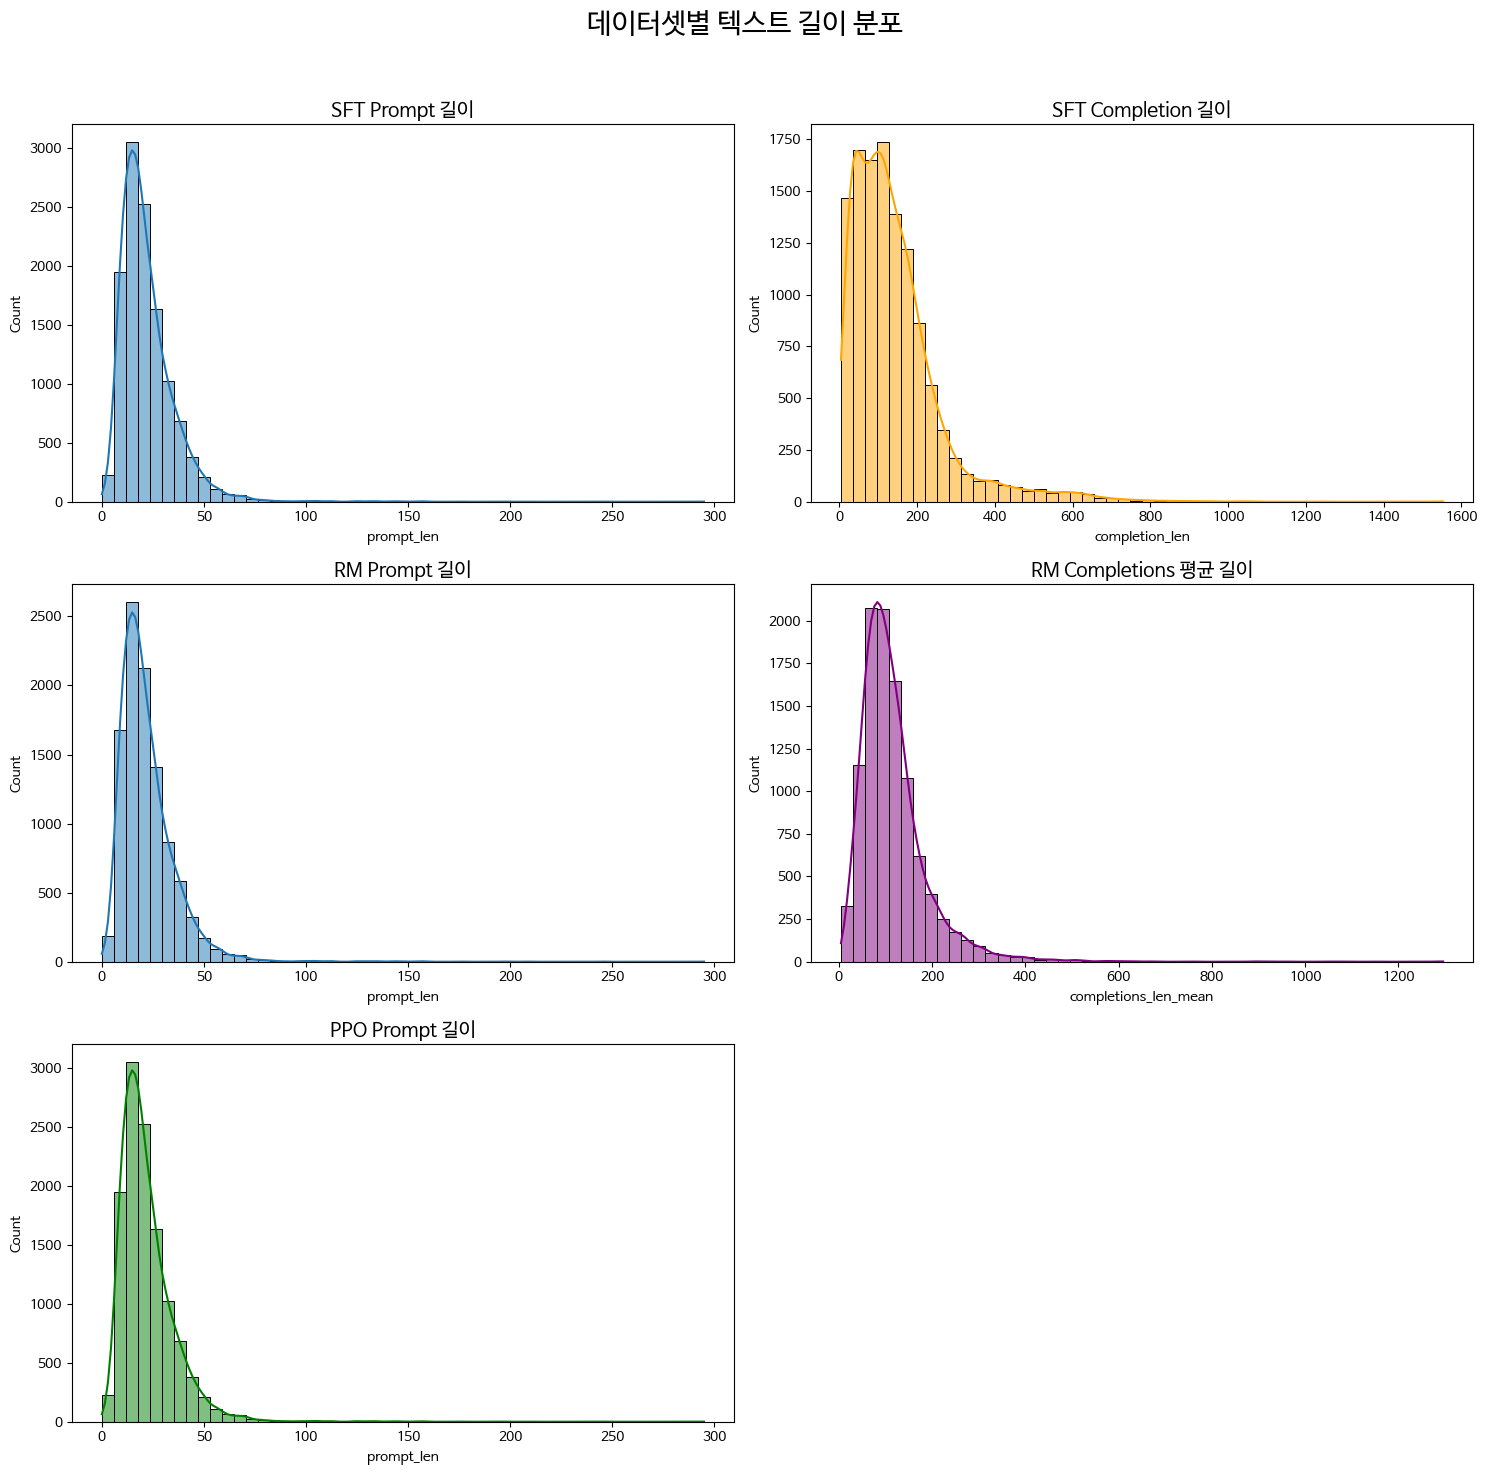

In [31]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=14)
title_fontprop = fm.FontProperties(fname=font_path, size=20)

# 데이터 길이 분포 시각화
if not df_sft.empty and not df_rm.empty and not df_ppo.empty:
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    # fig.suptitle()에 fontproperties를 직접 전달합니다.
    fig.suptitle('데이터셋별 텍스트 길이 분포', fontproperties=title_fontprop)

    # 1행: SFT 데이터
    sns.histplot(df_sft['prompt_len'], ax=axes[0, 0], kde=True, bins=50)
    axes[0, 0].set_title('SFT Prompt 길이', fontproperties=fontprop)

    sns.histplot(df_sft['completion_len'], ax=axes[0, 1], kde=True, color='orange', bins=50)
    axes[0, 1].set_title('SFT Completion 길이', fontproperties=fontprop)

    # 2행: RM 데이터
    sns.histplot(df_rm['prompt_len'], ax=axes[1, 0], kde=True, bins=50)
    axes[1, 0].set_title('RM Prompt 길이', fontproperties=fontprop)

    sns.histplot(df_rm['completions_len_mean'], ax=axes[1, 1], kde=True, color='purple', bins=50)
    axes[1, 1].set_title('RM Completions 평균 길이', fontproperties=fontprop)

    # 3행: PPO 데이터
    sns.histplot(df_ppo['prompt_len'], ax=axes[2, 0], kde=True, color='green', bins=50)
    axes[2, 0].set_title('PPO Prompt 길이', fontproperties=fontprop)
    
    axes[2, 1].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

else:
    print("데이터프레임이 비어 있어 시각화를 진행할 수 없습니다.")

#### 📊 EDA 결과 해석
그래프를 통해 데이터 길이 분포의 두 가지 주요 특징을 파악할 수 있습니다.

1. Prompt(지시어) 길이 분포
- SFT, RM, PPO 세 데이터셋 모두에서 Prompt의 길이는 매우 유사한 패턴을 보입니다.
- 분포가 오른쪽으로 긴 꼬리를 가지는 Right-Skewed 형태입니다. 이는 대부분의 Prompt가 50자 미만으로 매우 짧다는 것을 의미하며, 0에 가까운 길이의 데이터도 일부 존재합니다.
- 소수의 Prompt는 250자를 넘어가는 긴 길이를 가지는 **이상치(Outlier)**로 보입니다.

2. Completion(응답) 길이 분포
- SFT와 RM 데이터셋의 Completion 길이는 Prompt보다 길고 데이터가 더 넓게 분포해 있습니다.
- 마찬가지로 오른쪽으로 긴 꼬리를 가지는 형태이며, 대부분의 응답 길이는 50자에서 200자 사이에 집중되어 있습니다.
- 1,000자를 훌쩍 넘는 매우 긴 Completion 데이터들이 존재하는데, 이는 모델 학습에 부정적인 영향을 줄 수 있는 이상치일 가능성이 높습니다.

---

#### 🛠️ 데이터 정제 방향
위 해석을 바탕으로 모델의 학습 효율과 안정성을 높이기 위한 데이터 정제 전략은 다음과 같습니다.

1. 너무 짧은 데이터 제거 (Minimum Length Filtering)
- 근거: Prompt나 Completion의 길이가 0에 가깝거나 지나치게 짧은 데이터(예: 10자 미만)는 유의미한 정보를 담고 있지 않을 가능성이 높으며, 이는 모델이 의미 없는 패턴을 학습하게 만들 수 있습니다.
- 전략: 최소 글자 수를 기준으로 이보다 짧은 데이터는 학습 데이터셋에서 제외합니다. 예를 들어, Prompt 길이 > 10, Completion 길이 > 20과 같은 기준을 적용할 수 있습니다.

2. 너무 긴 데이터(이상치) 제거 (Maximum Length Filtering)
- 근거: 그래프의 긴 꼬리 부분에 해당하는 매우 긴 데이터들은 다음과 같은 문제를 유발할 수 있습니다.
- 메모리 문제: 학습 시 더 많은 GPU 메모리를 차지합니다.
- 학습 불안정: 긴 텍스트 하나가 Loss 계산에 큰 영향을 주어 학습을 불안정하게 만듭니다.
- 품질 저하: 기계로 생성된 매우 긴 텍스트는 의미 없는 내용이 반복될 수 있습니다.
- 잘림(Truncation): 대부분의 모델은 최대 입력 토큰 길이가 정해져 있어(예: 512, 1024), 이보다 긴 텍스트는 어차피 잘려서 정보 손실이 발생합니다.

---

- 최대 글자 수를 기준으로 이를 초과하는 이상치를 제거합니다. 그래프 분포를 고려할 때, 대부분의 데이터를 유지하면서 긴 꼬리 부분만 잘라내는 값을 기준으로 설정합니다.

#### 1.2. 데이터 정제 및 증강
분석 결과를 바탕으로 데이터를 정제합니다.

In [13]:
df_sft = pd.DataFrame(sft_data)
print(f"SFT 데이터 로드 완료: {len(df_sft)}개")

SFT 데이터 로드 완료: 12000개


In [15]:
import re

# 데이터 정제 함수 정의
def normalize_text(text):
    text = str(text); text = re.sub(r'\s+', ' ', text).strip(); text = text.replace('\\n', ' '); return text
def remove_special_chars(text):
    return re.sub(r'[^A-Za-z0-9가-힣ㄱ-ㅎㅏ-ㅣ一-龥.,?!\"\'\s]', '', text)
def filter_canned_responses(df):
    canned_patterns = ["저는 인공지능", "저는 AI", "제공해 드릴 수 없습니다", "도움을 드릴 수는 없습니다"]
    original_count = len(df)
    for pattern in canned_patterns:
        df = df[~df['completion'].str.contains(pattern, case=False, na=False)]
    removed_count = original_count - len(df)
    if removed_count > 0: print(f"상투적 답변 필터링: {removed_count}개 제거")
    return df

# SFT 데이터셋 정제 파이프라인
if not df_sft.empty:
    print("\n--- SFT 데이터셋 정제 시작 ---")
    initial_rows = len(df_sft)
    print(f"정제 전 데이터 수: {initial_rows}")

    df_sft['prompt'] = df_sft['prompt'].apply(normalize_text).apply(remove_special_chars)
    df_sft['completion'] = df_sft['completion'].apply(normalize_text).apply(remove_special_chars)

    df_sft.drop_duplicates(subset=['prompt', 'completion'], inplace=True)
    rows_after_dedup = len(df_sft)
    print(f"중복 제거 후 데이터 수: {rows_after_dedup} ({initial_rows - rows_after_dedup}개 제거)")

    df_sft['prompt_len'] = df_sft['prompt'].str.len()
    df_sft['completion_len'] = df_sft['completion'].str.len()
    df_sft_refined = df_sft[(df_sft['prompt_len'] > 10) & (df_sft['completion_len'] > 20) & (df_sft['prompt_len'] < 2048) & (df_sft['completion_len'] < 2048)].copy()
    rows_after_len_filter = len(df_sft_refined)
    print(f"길이 필터링 후 데이터 수: {rows_after_len_filter} ({rows_after_dedup - rows_after_len_filter}개 제거)")
    
    df_sft_refined = filter_canned_responses(df_sft_refined)

    refined_sft_path = 'kochatgpt_1_SFT_refined.jsonl'
    df_to_save = df_sft_refined[['prompt', 'completion']]
    df_to_save.to_json(refined_sft_path, orient='records', lines=True, force_ascii=False)
    
    print(f"\n--- 정제 완료 ---")
    print(f"최종 데이터 수: {len(df_to_save)}")
    print(f"정제된 SFT 데이터를 '{refined_sft_path}'에 저장했습니다.")
else:
    print("\nSFT 데이터 로딩에 실패하여 정제 작업을 진행할 수 없습니다.")


--- SFT 데이터셋 정제 시작 ---
정제 전 데이터 수: 12000
중복 제거 후 데이터 수: 12000 (0개 제거)
길이 필터링 후 데이터 수: 9745 (2255개 제거)
상투적 답변 필터링: 1533개 제거

--- 정제 완료 ---
최종 데이터 수: 8212
정제된 SFT 데이터를 'kochatgpt_1_SFT_refined.jsonl'에 저장했습니다.


#### 1.3. 모델 재학습 및 성능 비교
> **[평가 기준 1.1]** 기존 데이터셋을 추가로 정제하고, generation 성능을 올리기 위한 기법(Beam search, Top-k sampling 등)을 실험해 모델 성능을 향상시켰는가?

정제된 데이터셋으로 모델을 재학습시키고, 주관적 평가와 BLEU, ROUGE 등 정량적 평가 결과를 비교 분석합니다.

---

### 전략 2: 새로운 데이터셋 추가

#### 2.1. 데이터 수집
웹 크롤링 등을 통해 하나의 질문에 다양한 품질의 댓글이 달린 한국어 데이터를 수집합니다.

In [1]:
from datasets import load_dataset, concatenate_datasets
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer, default_data_collator

# 데이터 로드
koalpaca_dataset = load_dataset("beomi/KoAlpaca-v1.1a", split="train")

def convert_koalpaca(example):
    if example.get("input", "").strip():
        prompt = f"{example['instruction']}\n\nInput: {example['input']}"
    else:
        prompt = example["instruction"]
    return {"prompt": prompt, "completion": example["output"]}

koalpaca_dataset = koalpaca_dataset.map(
    convert_koalpaca,
    remove_columns=koalpaca_dataset.column_names
)

# 기존 SFT jsonl 데이터셋 불러오기
sft_dataset = load_dataset("json", data_files={"train": "kochatgpt_1_SFT_refined.jsonl"})

# 두 데이터셋 합치기
combined_dataset = concatenate_datasets([sft_dataset["train"], koalpaca_dataset])

# 토크나이저 준비
model_id = "skt/kogpt2-base-v2"
tokenizer = AutoTokenizer.from_pretrained(model_id)

# EOS / PAD 보정
if tokenizer.eos_token is None:
    tokenizer.add_special_tokens({"eos_token": ""})
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# 3. 전처리
def preprocess_function(examples):
    texts = [f"### Instruction:\n{p}\n\n### Response:\n{c}"
             for p, c in zip(examples["prompt"], examples["completion"])]
    out = tokenizer(texts, padding="max_length", truncation=True, max_length=512)
    out["labels"] = out["input_ids"].copy()   # ← 중요
    return out

tokenized_dataset = combined_dataset.map(
    preprocess_function,
    batched=True,
    remove_columns=combined_dataset.column_names
)

In [ ]:
# 모델 로드
model = AutoModelForCausalLM.from_pretrained(model_id)
if len(tokenizer) != model.get_input_embeddings().weight.size(0):
    model.resize_token_embeddings(len(tokenizer))

# 학습 중 캐시 끄기
model.config.use_cache = False

# Trainer 설정
training_args = TrainingArguments(
    output_dir="./results-strategy2-full-kogpt2",
    per_device_train_batch_size=1,
    gradient_accumulation_steps=4,
    num_train_epochs=1,
    logging_dir="./logs",
    save_strategy="epoch",
    logging_steps=50,
    fp16=True,                      # bf16=True 가능 환경이면 bf16 권장
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=default_data_collator
)

trainer.train()

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
50,7.799100
100,2.683900
150,1.093300
200,1.116100
250,1.082700
300,1.118500
350,1.147800
400,1.116400
450,1.140500
500,1.040500


In [ ]:
# generator 함수 (추론용)
def generator(prompt, max_new_tokens=128):
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    with torch.no_grad():  # 추론에서는 gradient 불필요
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            do_sample=True,
            temperature=0.7,
            top_p=0.9,
            pad_token_id=tokenizer.pad_token_id  # ★ PAD 토큰 명시 (중요)
        )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# 테스트 예시
print(generator("인공지능이 사회에 미치는 영향에 대해 설명해 주세요."))

#### 2.2. Ranking 데이터셋 구축
수집한 데이터를 기반으로 Reward 점수를 차등적으로 적용할 수 있는 Instruction 및 Ranking 데이터셋을 구축합니다.

In [ ]:
# 2. instruction + output 묶기
#    instruction 별로 여러 답변이 있을 수 있도록 그룹화
from collections import defaultdict
grouped = defaultdict(list)

for row in koalpaca:
    inst = row["instruction"]
    # input이 있으면 합쳐줌
    if row.get("input", "").strip():
        prompt = f"{inst}\n\nInput: {row['input']}"
    else:
        prompt = inst
    grouped[prompt].append(row["output"])

# 3. pairwise ranking 데이터 생성
ranking_data = []
for inst, responses in grouped.items():
    if len(responses) < 2:
        continue  # 최소 2개 이상 답변 필요
    # 랜덤하게 2개 뽑기
    r1, r2 = random.sample(responses, 2)
    # 임의 기준으로 chosen / rejected 나누기
    # (실제 연구에서는 human preference 필요!)
    chosen, rejected = (r1, r2) if len(r1) >= len(r2) else (r2, r1)

    ranking_data.append({
        "instruction": inst,
        "chosen": chosen,
        "rejected": rejected
    })

# 4. Dataset 객체로 변환
ranking_dataset = Dataset.from_list(ranking_data)

print(ranking_dataset[0])

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from trl import RewardTrainer, RewardConfig

# 1. 베이스 모델 (KoGPT2)
base_model_id = "skt/kogpt2-base-v2"
tokenizer = AutoTokenizer.from_pretrained(base_model_id)
tokenizer.pad_token = tokenizer.eos_token

# 2. Reward Model 정의 (num_labels=1 → 스칼라 점수 예측)
reward_model = AutoModelForSequenceClassification.from_pretrained(
    base_model_id,
    num_labels=1
)

# 3. 전처리 함수
def preprocess_rm_function(examples):
    # chosen/rejected 둘 다 토큰화
    chosen_encodings = tokenizer(
        [f"{examples['instruction']}\n\n{c}" for c in examples["chosen"]],
        truncation=True,
        padding="max_length",
        max_length=512
    )
    rejected_encodings = tokenizer(
        [f"{examples['instruction']}\n\n{r}" for r in examples["rejected"]],
        truncation=True,
        padding="max_length",
        max_length=512
    )
    return {
        "input_ids_chosen": chosen_encodings["input_ids"],
        "attention_mask_chosen": chosen_encodings["attention_mask"],
        "input_ids_rejected": rejected_encodings["input_ids"],
        "attention_mask_rejected": rejected_encodings["attention_mask"],
    }

# 4. 데이터셋 토큰화
tokenized_ranking = ranking_dataset.map(preprocess_rm_function, batched=True)

# 5. RewardTrainer 설정
reward_args = RewardConfig(
    output_dir="./results-strategy2-rm",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    logging_steps=50,
    save_strategy="epoch",
    fp16=True
)

reward_trainer = RewardTrainer(
    model=reward_model,
    args=reward_args,
    train_dataset=tokenized_ranking,
    tokenizer=tokenizer
)

# 6. 학습 시작
reward_trainer.train()

#### 2.3. 모델 재학습 및 추론 결과 비교
> **[평가 기준 1.2]** 새로운 데이터를 수집해 전처리를 수행하여 모델의 성능을 향상시켰는가?

기존 데이터셋에 새로운 데이터셋을 추가하여 모델을 재학습시키고, 추론 결과를 비교 분석합니다.

In [ ]:
import os, glob, torch
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModelForSequenceClassification
from trl import AutoModelForCausalLMWithValueHead, PPOConfig, PPOTrainer

# 디렉터리들 (앞 단계에서 사용한 경로와 맞춰주세요)
BASE_ID = "skt/kogpt2-base-v2"
SFT_OUT_DIR = "./results-strategy2-full-kogpt2"        # 전략2 SFT 결과(학습된 LM) 저장된 폴더
RM_DIR = "./results-strategy2-rm"                      # 앞서 학습한 Reward Model 저장 폴더
PPO_OUT_DIR = "./results-strategy2-ppo-kogpt2"        # PPO 결과 저장 폴더

# 토크나이저
tokenizer = AutoTokenizer.from_pretrained(BASE_ID)
tokenizer.pad_token = tokenizer.eos_token

# SFT 최종 체크포인트 자동 선택(마지막 checkpoint-XXXX 찾기, 없으면 SFT_OUT_DIR 자체 사용)
ckpts = sorted(glob.glob(os.path.join(SFT_OUT_DIR, "checkpoint-*")), key=lambda p: int(p.split("-")[-1]))
POLICY_INIT_DIR = ckpts[-1] if ckpts else SFT_OUT_DIR
print("PPO 초기 정책(checkpoint):", POLICY_INIT_DIR)

In [ ]:
# 1A) 업로드된 PPO 데이터 (권장)
try:
    ppo_ds = load_dataset("json", data_files={"train": "./KoChatGPT/data_kochatgpt/kochatgpt_2_RM.jsonl"}, split="train")
    # 컬럼 자동 감지
    PROMPT_KEYS = ["prompt","instruction","query","input","question"]
    p_key = next((k for k in PROMPT_KEYS if k in ppo_ds.column_names), None)
    assert p_key, f"프롬프트 컬럼을 찾지 못했습니다. 후보={PROMPT_KEYS}, 실제={ppo_ds.column_names}"
    ppo_ds = ppo_ds.rename_column(p_key, "query")
    cols_to_remove = [c for c in ppo_ds.column_names if c != "query"]
    if cols_to_remove: ppo_ds = ppo_ds.remove_columns(cols_to_remove)
    print("PPO prompts:", ppo_ds[0])
except Exception as e:
    print("업로드 PPO 데이터 사용 실패. KoAlpaca에서 instruction만 추출해 사용합니다.", e)
    # 1B) KoAlpaca에서 instruction만 사용
    koa = load_dataset("beomi/KoAlpaca-v1.1a", split="train")
    def to_query(ex):
        inst = ex["instruction"]
        if ex.get("input","").strip():
            inst = f"{inst}\n\nInput: {ex['input']}"
        return {"query": inst}
    ppo_ds = koa.map(to_query, remove_columns=koa.column_names)
    print("PPO prompts (from KoAlpaca):", ppo_ds[0])

In [ ]:
# RM 로드
rm_model = AutoModelForSequenceClassification.from_pretrained(
    RM_DIR, num_labels=1, device_map="auto"
)
rm_model.eval()

def get_reward(prompts, responses):
    """RM으로 스칼라 보상 계산"""
    texts = [f"### Instruction:\n{p}\n\n### Response:\n{r}" for p, r in zip(prompts, responses)]
    toks = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to(next(rm_model.parameters()).device)
    with torch.no_grad():
        out = rm_model(**toks).logits.squeeze(-1)  # (batch,)
    # 보상 스케일을 살짝 안정화하고 싶다면 .tanh() 등도 가능
    return out.detach().cpu()

In [ ]:
# 정책 모델 (SFT 결과 체크포인트)
policy = AutoModelForCausalLMWithValueHead.from_pretrained(
    POLICY_INIT_DIR, device_map="auto"
)
policy.pretrained_model.config.pad_token_id = tokenizer.eos_token_id
policy.eval()

# 레퍼런스(초기 정책 스냅샷)
ref_model = AutoModelForCausalLMWithValueHead.from_pretrained(
    POLICY_INIT_DIR, device_map="auto"
)
ref_model.pretrained_model.config.pad_token_id = tokenizer.eos_token_id
ref_model.eval()

In [ ]:
config = PPOConfig(
    model_name=POLICY_INIT_DIR,
    learning_rate=1e-6,         # 너무 크면 망가집니다. (1e-6 ~ 5e-6 범위 탐색 권장)
    batch_size=2,               # 한 번에 처리할 샘플 수
    mini_batch_size=2,
    gradient_accumulation_steps=4,
    ppo_epochs=4,
    target_kl=0.1,              # KL 제어 (0.05~0.2 사이 튜닝)
    seed=42
)

ppo_trainer = PPOTrainer(
    config=config,
    tokenizer=tokenizer,
    model=policy,
    ref_model=ref_model,
    dataset=ppo_ds,            # "query" 컬럼 사용
    data_collator=None
)

In [ ]:
from tqdm import trange

max_new_tokens = 128
steps = len(ppo_trainer.dataset)  # 전량 학습은 오래 걸릴 수 있음 → 일부만 돌리려면 min(steps, N)

for step, batch in zip(trange(steps), ppo_trainer.dataloader):
    queries = batch["query"]

    # 1) 응답 생성
    q_tok = tokenizer(list(queries), return_tensors="pt", padding=True, truncation=True, max_length=512).to(ppo_trainer.model.pretrained_model.device)
    with torch.no_grad():
        resp_ids = ppo_trainer.model.generate(
            **q_tok,
            max_new_tokens=max_new_tokens,
            do_sample=True, top_p=0.9, temperature=0.7,
            pad_token_id=tokenizer.eos_token_id
        )

    # 응답 텍스트 추출
    responses = []
    for q, ids in zip(queries, resp_ids):
        text = tokenizer.decode(ids, skip_special_tokens=True)
        # 프롬프트 포함 시 잘라내기(간단 버전)
        cut = text.find(q)
        gen = text[cut+len(q):].strip() if cut >= 0 else text.strip()
        responses.append(gen)

    # 2) RM 보상
    rewards = get_reward(queries, responses)  # tensor on CPU

    # 3) PPO 스텝
    q_toks = q_tok["input_ids"]
    r_toks = tokenizer(responses, return_tensors="pt", padding=True, truncation=True, max_length=512).to(q_toks.device)["input_ids"]
    stats = ppo_trainer.step(q_toks, r_toks, torch.tensor(rewards, device=q_toks.device, dtype=torch.float))
    ppo_trainer.log_stats(stats, batch, rewards)

    # 주기적으로 저장
    if (step + 1) % 200 == 0:
        ppo_trainer.save_pretrained(PPO_OUT_DIR)

# 최종 저장
ppo_trainer.save_pretrained(PPO_OUT_DIR)
tokenizer.save_pretrained(PPO_OUT_DIR)
print("PPO 학습/저장 완료:", PPO_OUT_DIR)

In [ ]:
# SFT(초기 정책) 로드
sft_model = AutoModelForCausalLM.from_pretrained(POLICY_INIT_DIR, device_map="auto")
sft_model.eval()

# PPO 결과 로드 (ValueHead 붙은 형태)
ppo_model = AutoModelForCausalLMWithValueHead.from_pretrained(PPO_OUT_DIR, device_map="auto")
ppo_model.eval()

def generate(model, prompt, max_new_tokens=128):
    inp = tokenizer(prompt, return_tensors="pt").to(next(model.parameters()).device)
    with torch.no_grad():
        out = model.generate(**inp, max_new_tokens=max_new_tokens, do_sample=True, top_p=0.9, temperature=0.7, pad_token_id=tokenizer.eos_token_id)
    return tokenizer.decode(out[0], skip_special_tokens=True)

test_prompt = "인공지능이 한국 사회에 미치는 긍정적/부정적 영향을 각각 요약해줘."
print("=== SFT 출력 ===")
print(generate(sft_model, test_prompt))

print("\n=== PPO 출력 ===")
print(generate(ppo_model.pretrained_model, test_prompt))  # ValueHead 래핑 내부의 LM 사용

In [ ]:
# 1. Metric 불러오기
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")
bertscore = evaluate.load("bertscore")

# 2. 예시 데이터
predictions = [
    "인공지능은 사회 전반에 큰 변화를 일으킨다.",
    "AI는 사회에 새로운 기회를 제공한다."
]

references = [
    ["인공지능은 사회에 큰 영향을 끼친다."],
    ["AI는 새로운 기회를 창출한다."]
]

# 3. BLEU
bleu_result = bleu.compute(predictions=predictions, references=references)

# 4. ROUGE
rouge_result = rouge.compute(predictions=predictions, references=[r[0] for r in references])

# 5. BERTScore (한국어 모델 사용 가능 → 'microsoft/deberta-xlarge-mnli' 또는 'klue/bert-base')
bertscore_result = bertscore.compute(predictions=predictions, references=[r[0] for r in references], lang="ko")

print("=== BLEU ===")
print(bleu_result)

print("\n=== ROUGE ===")
print(rouge_result)

print("\n=== BERTScore (F1 평균) ===")
print(sum(bertscore_result["f1"]) / len(bertscore_result["f1"]))

---

### 전략 3: Foundation Model 교체 / 학습 전략 변경

#### 3.1. 모델 교체 및 최적화
`skt/ko-gpt-trinity-1.2B-v0.5` 모델로 교체하거나, SFT, RM, PPO 학습 전략을 변경/개선합니다. OOM 문제 해결을 위해 허깅페이스의 training arguments를 조합하여 최적의 하이퍼파라미터를 찾습니다.

In [1]:
!pip install -q -U transformers accelerate bitsandbytes peft datasets trl

In [2]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, TrainingArguments
from peft import LoraConfig, get_peft_model
from datasets import load_dataset
from trl import SFTTrainer

### 1. SFT 데이터셋 전처리 / 토크나이징 / 학습

In [3]:
# 1. Base 모델 로드 (Polyglot-Ko 1.3B)
model_id = "EleutherAI/polyglot-ko-1.3b"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

base_model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map="auto"
)
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.pad_token = tokenizer.eos_token

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
# 2. LoRA 설정
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["query_key_value"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model = get_peft_model(base_model, lora_config)

In [7]:
from datasets import load_dataset

dataset = load_dataset(
    "json",
    data_files={"train": "./KoChatGPT/data_kochatgpt/kochatgpt_1_SFT.jsonl"},
    split="train"
)

Generating train split: 0 examples [00:00, ? examples/s]

In [18]:
def preprocess_function(examples):
    texts = []
    for p, c in zip(examples["prompt"], examples["completion"]):
        prompt = f"### Instruction:\n{p}\n\n### Response:\n{c}"
        texts.append(prompt)
    return {"text": texts}

processed_dataset = dataset.map(
    preprocess_function,
    batched=True,
    remove_columns=dataset.column_names
)

print(processed_dataset[0]["text"])

### Instruction:
불고기용 고기 한우에요?

### Response:
'저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기, 돼지고기 등 다양한 종류의 고기를 사용합니다. 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에, 한우를 사용하는 경우도 많습니다. 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 바랍니다.


In [19]:
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=512)

tokenized_dataset = processed_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

In [20]:
from transformers import TrainingArguments, Trainer, DataCollatorForLanguageModeling

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    logging_dir="./logs",
    save_strategy="epoch",
    logging_steps=50,
    fp16=True
)

data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=data_collator
)

trainer.train()

Step,Training Loss
50,3.362400
100,2.821100
150,2.088900
200,1.894700
250,1.817500
300,1.890500
350,1.741700
400,1.773700
450,1.752300
500,1.786000


TrainOutput(global_step=6000, training_loss=1.6376587905883788, metrics={'train_runtime': 3406.1748, 'train_samples_per_second': 3.523, 'train_steps_per_second': 1.762, 'total_flos': 4.6882873147392e+16, 'train_loss': 1.6376587905883788, 'epoch': 1.0})

In [22]:
# 어댑터 저장
model.save_pretrained("./polyglot-1.3b-lora-adapter")
tokenizer.save_pretrained("./polyglot-1.3b-lora-adapter")

('./polyglot-1.3b-lora-adapter/tokenizer_config.json',
 './polyglot-1.3b-lora-adapter/special_tokens_map.json',
 './polyglot-1.3b-lora-adapter/tokenizer.json')

In [48]:
# === SFT 학습 후 저장 ===
OUTPUT_DIR = "./results-strategy2-full-kogpt2-lora"

# Hugging Face Trainer로 학습 마친 후 ↓ 이 부분 추가
model.save_pretrained(OUTPUT_DIR)      # LoRA 어댑터 저장 (adapter_config.json, adapter_model.bin 포함)
tokenizer.save_pretrained(OUTPUT_DIR)  # 토크나이저도 같이 저장
print(f"SFT 모델 + LoRA 어댑터 저장 완료: {OUTPUT_DIR}")

SFT 모델 + LoRA 어댑터 저장 완료: ./results-strategy2-full-kogpt2-lora


### 2. RM 학습 / 텍스트 합치기 / 토크나이징 / 학습

In [23]:
BASE_ID = "EleutherAI/polyglot-ko-1.3b"            # 베이스 모델
SFT_ADAPTER_DIR = "./polyglot-1.3b-lora-adapter"   # 이미 학습/저장된 SFT LoRA 어댑터 경로
RM_DIR = "./rm-polyglot-1.3b"                      # RM 저장 경로
PPO_OUT_DIR = "./ppo-polyglot-1.3b-lora"           # PPO 결과 경로

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.bfloat16
)

tokenizer = AutoTokenizer.from_pretrained(BASE_ID)
tokenizer.pad_token = tokenizer.eos_token

In [24]:
rm_ds = load_dataset("json", data_files={"train": "./KoChatGPT/data_kochatgpt/kochatgpt_2_RM.jsonl"}, split="train")

print("RM columns:", rm_ds.column_names[:10])
print("Sample:", rm_ds[0])

Generating train split: 0 examples [00:00, ? examples/s]

RM columns: ['prompt', 'completion_0', 'completion_1', 'completion_2', 'ranking']
Sample: {'prompt': '번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나?', 'completion_0': 'Allow me to answer your question. I know that you are curious about me.', 'completion_1': '번디는 다양한 인터뷰자들과 뉴스홍보 담당자들과의 면담 때 밝혔다.', 'completion_2': '라이언에게 말했다.', 'ranking': [2, 1, 0]}


In [36]:
# ranking 데이터셋에서 chosen / rejected 뽑기
def convert_rm_format(example):
    chosen_idx = example["ranking"][0]      # 가장 선호
    rejected_idx = example["ranking"][-1]   # 가장 낮음
    return {
        "prompt": example["prompt"],
        "chosen": example[f"completion_{chosen_idx}"],
        "rejected": example[f"completion_{rejected_idx}"]
    }

rm_ds_pairwise = rm_ds.map(convert_rm_format)
print(rm_ds_pairwise[0])

Map:   0%|          | 0/10220 [00:00<?, ? examples/s]

{'prompt': '번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나?', 'completion_0': 'Allow me to answer your question. I know that you are curious about me.', 'completion_1': '번디는 다양한 인터뷰자들과 뉴스홍보 담당자들과의 면담 때 밝혔다.', 'completion_2': '라이언에게 말했다.', 'ranking': [2, 1, 0], 'chosen': '라이언에게 말했다.', 'rejected': 'Allow me to answer your question. I know that you are curious about me.'}


In [37]:
# RewardTrainer는 chosen / rejected 텍스트만 있으면 충분
def rm_format(example):
    return {
        "chosen": f"### Instruction:\n{example['prompt']}\n\n### Response:\n{example['chosen']}",
        "rejected": f"### Instruction:\n{example['prompt']}\n\n### Response:\n{example['rejected']}"
    }

rm_ds_proc = rm_ds_pairwise.map(rm_format)
print(rm_ds_proc[0])

Map:   0%|          | 0/10220 [00:00<?, ? examples/s]

{'prompt': '번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나?', 'completion_0': 'Allow me to answer your question. I know that you are curious about me.', 'completion_1': '번디는 다양한 인터뷰자들과 뉴스홍보 담당자들과의 면담 때 밝혔다.', 'completion_2': '라이언에게 말했다.', 'ranking': [2, 1, 0], 'chosen': '### Instruction:\n번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나?\n\n### Response:\n라이언에게 말했다.', 'rejected': '### Instruction:\n번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나?\n\n### Response:\nAllow me to answer your question. I know that you are curious about me.'}


In [39]:
!pip show trl

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Name: trl
Version: 0.23.0
Summary: Train transformer language models with reinforcement learning.
Home-page: https://github.com/huggingface/trl
Author: Leandro von Werra
Author-email: leandro.vonwerra@gmail.com
License: 
Location: /opt/conda/lib/python3.12/site-packages
Requires: accelerate, datasets, transformers
Required-by: 


In [43]:
from transformers import AutoModelForSequenceClassification
from trl import RewardTrainer, RewardConfig
from peft import LoraConfig, get_peft_model

BASE_ID = "skt/kogpt2-base-v2"
RM_DIR = "./reward_model_lora"

# Reward Model (Classification Head 달기)
rm_model = AutoModelForSequenceClassification.from_pretrained(
    BASE_ID,
    num_labels=1,        
    device_map="auto"     
)

# LoRA 어댑터 붙이기
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["c_attn", "c_proj"],  # GPT2/KoGPT2 attention 구조
    lora_dropout=0.05,
    bias="none",
    task_type="SEQ_CLS"   # Reward Model → Classification task
)
rm_model = get_peft_model(rm_model, lora_config)
rm_model.print_trainable_parameters()

# 학습 설정
rm_args = RewardConfig(
    output_dir=RM_DIR,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    learning_rate=5e-5,    
    num_train_epochs=2,
    fp16=True,
    logging_steps=20,
    save_strategy="epoch",
    report_to="none",
    max_length=512
)

# RewardTrainer (trl 0.23.0)
rm_trainer = RewardTrainer(
    model=rm_model,
    args=rm_args,
    processing_class=tokenizer,  # tokenizer 대신 processing_class로 전달
    train_dataset=rm_ds_proc,    # convert_rm_format → rm_format 거친 데이터
    eval_dataset=None
)

# 학습 실행
rm_trainer.train()

# 저장
rm_trainer.save_model(RM_DIR)
tokenizer.save_pretrained(RM_DIR)
print("LoRA 기반 RM 학습/저장 완료:", RM_DIR)

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at skt/kogpt2-base-v2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 811,776 || all params: 125,976,576 || trainable%: 0.6444


/opt/conda/lib/python3.12/site-packages/peft/tuners/lora/layer.py:2174: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


Filter:   0%|          | 0/10220 [00:00<?, ? examples/s]

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'eos_token_id': 2, 'bos_token_id': None, 'pad_token_id': 2}.
You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Step,Training Loss
20,0.335100
40,0.114200
60,0.059500
80,0.018300
100,0.046000
120,0.023500
140,0.010100
160,0.069200
180,0.065700
200,0.041400


LoRA 기반 RM 학습/저장 완료: ./reward_model_lora


### 3. PPO 데이터 로드 / 학습 / 결과 추론

In [49]:
import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModelForSequenceClassification
from trl import AutoModelForCausalLMWithValueHead, PPOConfig, PPOTrainer, create_reference_model

# ===== 기본 설정 =====
BASE_ID = "skt/kogpt2-base-v2"
SFT_ADAPTER_DIR = "./results-strategy2-full-kogpt2-lora"
RM_DIR = "./reward_model_lora"                              # 앞서 학습 완료한 RM (LoRA 학습본 또는 FT본)
PPO_OUT_DIR = "./ppo_policy_out"

tokenizer = AutoTokenizer.from_pretrained(BASE_ID)
tokenizer.pad_token = tokenizer.eos_token

# ===== 정책 모델: full precision + SFT LoRA 장착 → ValueHead 부착 =====
base = AutoModelForCausalLM.from_pretrained(BASE_ID, device_map="auto")
from peft import PeftModel
policy_lm = PeftModel.from_pretrained(base, SFT_ADAPTER_DIR)  # SFT 어댑터 로드
policy_lm.eval()

# Value Head를 부착한 정책 모델 생성
policy = AutoModelForCausalLMWithValueHead.from_pretrained(policy_lm)
policy.eval()

# ===== 레퍼런스 모델(동일 구조 스냅샷; KL 기준) =====
ref_model = create_reference_model(policy)  # policy의 스냅샷을 참조모델로
ref_model.eval()

ValueError: Target modules {'query_key_value'} not found in the base model. Please check the target modules and try again.

In [ ]:
# ===== PPO 프롬프트 데이터 =====
ppo_ds = load_dataset("json", data_files={"train": "/mnt/data/kochatgpt_3_PPO.jsonl"}, split="train")
PPO_PROMPT_KEYS = ["prompt", "instruction", "query", "input", "question"]
def pick_first_key(keys, columns):
    for k in keys:
        if k in columns: return k
    return None
pkey = pick_first_key(PPO_PROMPT_KEYS, ppo_ds.column_names)
assert pkey, f"PPO 프롬프트 컬럼을 찾지 못했습니다. 후보={PPO_PROMPT_KEYS}, 실제={ppo_ds.column_names}"

def ppo_format(ex):
    return {"query": ex[pkey]}
ppo_ds_proc = ppo_ds.map(ppo_format, remove_columns=[c for c in ppo_ds.column_names if c != pkey])

# ===== RM 스코어러 (평가만 하므로 양자화 유지해도 됨; 문제시 quantization_config 제거) =====
try:
    rm_scoring = AutoModelForSequenceClassification.from_pretrained(
        RM_DIR, num_labels=1, device_map="auto"  # quantization_config=bnb_config ← 필요시만 사용
    )
except Exception:
    # bnb 문제가 있으면 full precision로 로드
    rm_scoring = AutoModelForSequenceClassification.from_pretrained(
        RM_DIR, num_labels=1, device_map="auto"
    )
rm_scoring.eval()

In [ ]:
def get_reward(prompts, responses):
    # prompts, responses: list[str]
    texts = [f"### Instruction:\n{p}\n\n### Response:\n{r}" for p, r in zip(prompts, responses)]
    toks = tokenizer(
        texts, return_tensors="pt", padding=True, truncation=True, max_length=512
    ).to(next(rm_scoring.parameters()).device)
    with torch.no_grad():
        out = rm_scoring(**toks).logits.squeeze(-1)  # (batch,)
    return out.detach()

# ===== PPO 설정 및 트레이너 =====
config = PPOConfig(
    model_name=BASE_ID,
    learning_rate=1e-6,          # LoRA기반 SFT 위에서 미세 조정 → 작게 시작
    batch_size=2,
    mini_batch_size=2,
    gradient_accumulation_steps=4,
    ppo_epochs=4,
    target_kl=0.1,
    seed=42
)

ppo_trainer = PPOTrainer(
    config=config,
    tokenizer=tokenizer,
    model=policy,
    ref_model=ref_model,
    dataset=ppo_ds_proc,   # "query" 필드 사용
    data_collator=None
)

# ===== PPO 학습 루프 =====
from tqdm import trange
max_new_tokens = 128

for step, batch in zip(trange(len(ppo_trainer.dataset)), ppo_trainer.dataloader):
    queries = batch["query"]

    # 1) 응답 생성
    q_tok = tokenizer(
        list(queries), return_tensors="pt", padding=True, truncation=True, max_length=512
    ).to(ppo_trainer.accelerator.device)
    with torch.no_grad():
        resp_ids = policy.generate(
            **q_tok,
            max_new_tokens=max_new_tokens,
            do_sample=True, top_p=0.9, temperature=0.7,
            pad_token_id=tokenizer.eos_token_id
        )

    # 2) 응답 텍스트 분리(프롬프트 제거)
    responses = []
    for q, ids in zip(queries, resp_ids):
        text = tokenizer.decode(ids, skip_special_tokens=True)
        cut = text.find(q)
        gen = text[cut+len(q):].strip() if cut >= 0 else text.strip()
        responses.append(gen)

    # 3) RM 보상
    rewards = get_reward(queries, responses).to(ppo_trainer.accelerator.device)

    # 4) PPO 업데이트 (텐서 입력)
    query_tensors = q_tok["input_ids"]
    response_tensors = tokenizer(
        responses, return_tensors="pt", padding=True, truncation=True, max_length=512
    ).to(ppo_trainer.accelerator.device)["input_ids"]

    stats = ppo_trainer.step(query_tensors, response_tensors, rewards)
    ppo_trainer.log_stats(stats, batch, rewards)

    if (step + 1) % 200 == 0:
        ppo_trainer.save_pretrained(PPO_OUT_DIR)

# 최종 저장
ppo_trainer.save_pretrained(PPO_OUT_DIR)
tokenizer.save_pretrained(PPO_OUT_DIR)
print("PPO 학습/저장 완료:", PPO_OUT_DIR)

In [ ]:
# ===== 추론 테스트 =====
ppo_policy = AutoModelForCausalLMWithValueHead.from_pretrained(PPO_OUT_DIR)
ppo_policy.eval()
tok = AutoTokenizer.from_pretrained(PPO_OUT_DIR)
tok.pad_token = tok.eos_token

prompt = "인공지능이 한국 사회에 미치는 긍정적/부정적 영향을 요약해줘."
inputs = tok(prompt, return_tensors="pt").to(ppo_policy.pretrained_model.device)
with torch.no_grad():
    out_ids = ppo_policy.generate(
        **inputs, max_new_tokens=200, do_sample=True, top_p=0.9, temperature=0.7,
        pad_token_id=tok.eos_token_id
    )
print(tok.decode(out_ids[0], skip_special_tokens=True))

In [ ]:
ppo_ds = load_dataset("json", data_files={"train": "./KoChatGPT/data_kochatgpt/kochatgpt_3_PPO.jsonl"}, split="train")
print("PPO columns:", ppo_ds.column_names[:10])
print("Sample:", ppo_ds[0])

PPO_PROMPT_KEYS = ["prompt", "instruction", "query", "input", "question"]
ppo_p_key = pick_first_key(PPO_PROMPT_KEYS, ppo_ds.column_names)
assert ppo_p_key, f"PPO 프롬프트 컬럼을 찾지 못했습니다: 후보={PPO_PROMPT_KEYS}"

def ppo_format(example):
    return {"query": example[ppo_p_key]}
ppo_ds_proc = ppo_ds.map(ppo_format, remove_columns=[c for c in ppo_ds.column_names if c != ppo_p_key])

In [ ]:
# RM 로드 (fp16/4bit 혼용 환경에서 eval만 수행)
rm_scoring = AutoModelForSequenceClassification.from_pretrained(
    RM_DIR, num_labels=1, quantization_config=bnb_config, device_map="auto"
)
rm_scoring.eval()

def get_reward(prompts, responses):
    # prompts, responses: list[str]
    texts = [f"### Instruction:\n{p}\n\n### Response:\n{r}" for p, r in zip(prompts, responses)]
    toks = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to(policy.device)
    with torch.no_grad():
        out = rm_scoring(**toks)
        # shape: (batch, 1)
        rewards = out.logits.squeeze(-1).detach()
    return rewards

In [ ]:
config = PPOConfig(
    model_name=BASE_ID,
    learning_rate=1e-6,
    batch_size=2,                 # GPU 여건에 맞게 조절
    mini_batch_size=2,
    gradient_accumulation_steps=4,
    ppo_epochs=4,
    kl_penalty="kl",              # 기본 KL
    target_kl=0.1,
    seed=42
)

ppo_trainer = PPOTrainer(
    config=config,
    tokenizer=tokenizer,
    model=policy,
    ref_model=ref_model,
    dataset=ppo_ds_proc,          # HF Dataset 가능 (query 칼럼 사용)
    data_collator=None
)

In [ ]:
from tqdm import trange

# 간단한 PPO 루프 (전량 학습 시 시간 오래 걸릴 수 있음)
max_new_tokens = 128

for step, batch in zip(trange(len(ppo_trainer.dataset)), ppo_trainer.dataloader):
    queries = batch["query"]
    # 1) 응답 생성
    query_toks = tokenizer(list(queries), return_tensors="pt", padding=True, truncation=True, max_length=512).to(policy.device)
    with torch.no_grad():
        responses_toks = policy.generate(
            **query_toks,
            max_new_tokens=max_new_tokens,
            do_sample=True, top_p=0.9, temperature=0.7, pad_token_id=tokenizer.eos_token_id
        )
    # 응답 텍스트 분리(프롬프트 부분 제외)
    responses = []
    for q, resp_ids in zip(queries, responses_toks):
        text = tokenizer.decode(resp_ids, skip_special_tokens=True)
        # 단순 분리(포맷에 맞춰 커스텀 가능)
        # prompt가 text 앞부분에 포함되어 있다면 잘라내기
        cut = text.find(q)
        if cut >= 0:
            gen = text[cut + len(q):].strip()
        else:
            gen = text.strip()
        responses.append(gen)

    # 2) RM으로 보상 계산
    rewards = get_reward(queries, responses)

    # 3) PPO 업데이트
    # note: PPOTrainer는 텐서 입력을 기대
    query_tensors = query_toks["input_ids"]
    response_tensors = tokenizer(responses, return_tensors="pt", padding=True, truncation=True, max_length=512).to(policy.device)["input_ids"]

    stats = ppo_trainer.step(query_tensors, response_tensors, rewards)
    ppo_trainer.log_stats(stats, batch, rewards)

    # 샘플 저장 주기
    if (step + 1) % 200 == 0:
        ppo_trainer.save_pretrained(PPO_OUT_DIR)

# 최종 저장
ppo_trainer.save_pretrained(PPO_OUT_DIR)
tokenizer.save_pretrained(PPO_OUT_DIR)
print("PPO 학습/저장 완료:", PPO_OUT_DIR)

In [ ]:
# 정책 모델 로드(LoRA+ValueHead 포함 저장본)
ppo_policy = AutoModelForCausalLMWithValueHead.from_pretrained(PPO_OUT_DIR)
ppo_policy.eval()
tok = AutoTokenizer.from_pretrained(PPO_OUT_DIR)
tok.pad_token = tok.eos_token

prompt = "인공지능이 한국 사회에 미치는 긍정적/부정적 영향을 요약해줘."
inputs = tok(prompt, return_tensors="pt").to(ppo_policy.pretrained_model.device)

with torch.no_grad():
    out_ids = ppo_policy.generate(**inputs, max_new_tokens=200, do_sample=True, top_p=0.9, temperature=0.7)
print(tok.decode(out_ids[0], skip_special_tokens=True))

#### 3.2. Generator 함수 수정 및 인퍼런스
> **[평가 기준 1.3]** 더 적절한 학습 전략(SFT, RM, PPO)을 적용하거나 initial model을 변경해 모델의 성능을 향상시켰는가?

변경된 모델에 맞게 `generator` 함수를 수정하고, 모델 추론 결과를 제시합니다.

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import PeftModel
import torch

def load_model(model_dir, base_id="EleutherAI/polyglot-ko-1.3b"):
    """저장된 LoRA 어댑터 모델 불러오기"""
    bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.bfloat16,
    )

    # 베이스 모델
    base_model = AutoModelForCausalLM.from_pretrained(
        base_id,
        quantization_config=bnb_config,
        device_map="auto"
    )
    tokenizer = AutoTokenizer.from_pretrained(base_id)
    tokenizer.pad_token = tokenizer.eos_token

    # LoRA 어댑터 병합
    model = PeftModel.from_pretrained(base_model, model_dir)
    model.eval()
    return model, tokenizer


def generator(model, tokenizer, prompt, max_new_tokens=128):
    """Generator 함수"""
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            do_sample=True,
            top_p=0.9,
            temperature=0.7,
            pad_token_id=tokenizer.eos_token_id
        )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

#### ✅ SFT 모델 인퍼런스

In [ ]:
# SFT 결과 모델 불러오기
sft_model_dir = "./polyglot-1.3b-lora-adapter"
model, tokenizer = load_model(sft_model_dir)

prompt = "불고기용 고기 한우에요?"
result = generator(model, tokenizer, prompt)

print("=== [SFT 모델 출력] ===")
print(result)

#### ✅ RM 모델 인퍼런스
- 텍스트 평가용이므로 문장이 좋은지/나쁜지 점수화하는 과정을 보여줍니다.

In [ ]:
rm_model_dir = "./rm-polyglot-1.3b"
rm_model = AutoModelForSequenceClassification.from_pretrained(
    rm_model_dir, num_labels=1, device_map="auto"
)
tokenizer = AutoTokenizer.from_pretrained(rm_model_dir)

prompt = "불고기용 고기 한우에요?"
response = "불고기용 고기는 한우뿐만 아니라 다양한 고기를 사용할 수 있습니다."

inputs = tokenizer(f"### Instruction:\n{prompt}\n\n### Response:\n{response}",
                   return_tensors="pt", truncation=True, padding=True).to(rm_model.device)

with torch.no_grad():
    score = rm_model(**inputs).logits.item()

print("=== [RM 점수] ===")
print(f"응답 적합도 점수: {score:.4f}")

#### ✅ PPO 모델 인퍼런스

In [ ]:
# PPO 결과 모델 불러오기
ppo_model_dir = "./ppo-polyglot-1.3b-lora"
model, tokenizer = load_model(ppo_model_dir)

prompt = "인공지능이 한국 사회에 미치는 긍정적/부정적 영향을 요약해줘."
result = generator(model, tokenizer, prompt)

print("=== [PPO 모델 출력] ===")
print(result)

---

## 회고

- 아직 이번 노드에 대해 완전히 이해하지 못한 것 같아 프로젝트를 하다 방향을 많이 잃었습니다. 다시 공부하고 프로젝트를 시작하니 더 오래 걸려서 프로젝트를 시간 내에 완전히 끝내지 못했습니다. 
- 이번 프로젝트는 실험 조건에 따라 파일을 나눠서 작업하는게 좋을 것 같다는 생각이 들었습니다. (모델들끼리 꼬이는 경우가 너무 많이 발생해서 CUDA 관련 오류도 많이 발생했고, 그냥 커널 자체가 꺼져버리는 문제가 많이 발생했었습니다.)